In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
train_df = pd.read_csv("./data/bank_app_reviews_train.csv")
train_df.head()

,리뷰일,평점,사용자리뷰,업체답변,은행명
0,2023-12-21,5,엄빠 폰에 설치해드렸는데 두분 다 쓰기 편하다고 하시네요 ㅎㅎ 저도 쓰고있음!,NaN,하나
1,2025-02-17,1,Cd기 축소 연장하려면 이 어플 깔라는데 왜 30퍼에서 안깔리는지 아니 애초에 슈퍼...,안녕하세요. 신한은행입니다.\n먼저 SOL사용에 불편을 드려 죄송합니다.\n어플의 ...,신한
2,2024-07-26,5,서비스가 통합되어 있어서 점점 사용빈도가 높아지네요.,고객님 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. KB스타뱅킹...,국민
3,2024-09-01,1,카드 충천이 안됌,"안녕하세요. 전민구 님, 토스팀입니다. 남겨주신 내용만으로는 겪고계신 불편사항의 자...",토스
4,2023-11-13,1,알뜰폰 인증이 안돼요.....,"안녕하세요 헤이모두들안녕님, 우리은행입니다. 먼저 이용에 불편을 드려 매우 죄송합니...",우리


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22246 entries, 0 to 22245
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   리뷰일     22246 non-null  object
 1   평점      22246 non-null  int64 
 2   사용자리뷰   22246 non-null  object
 3   업체답변    19141 non-null  object
 4   은행명     22246 non-null  object
dtypes: int64(1), object(4)
memory usage: 869.1+ KB


In [4]:
train_df = train_df.drop('업체답변', axis=1)

In [5]:
train_df['평점'].value_counts()

평점
5    11416
1     6751
4     1824
3     1308
2      947
Name: count, dtype: int64

<Axes: xlabel='평점'>

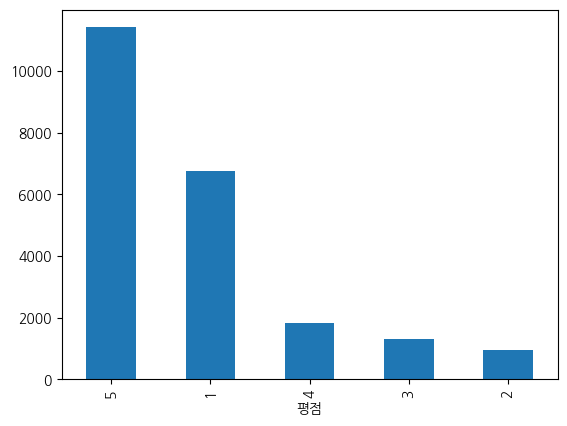

In [6]:
train_df['평점'].value_counts().plot(kind='bar')

In [7]:
train_df.loc[train_df['평점'] == 4, '사용자리뷰'].head(20)

11                                                   좋아요
14                                                    좋음
27     Not Found 실행이 안됩니다 하나은행 어플 누르면 Not Found 메세지 뜨...
30     이전거보다 메뉴가 많아진건지 내가 사용하는게 걷기가 숨겨져 불편.확인 할때마다 일상...
38              보상을 얻기위해 광고를 보는건 상관없는데 광고 좀 가려 받으면 안되나요?
69     오늘 토스 재가입 후 저도 모르는 사이 토스페이가입되었네요. 가입 금액(5,900원...
75                                     빠르고 정확함 이용을 권장합니다
82                                    아직까지 잘 사용하고 있습니다 ?
91     지난 달부터 갑자기 홈->앞으로 낼 카드값 부분에 특정 카드사 한곳만 뜹니다ㅠ 분명...
97                                                    만족
98                                                    좋음
106    가상계좌가 브랜드콘 같은걸 살때는 아무 불편함이없는데 온라인으로 결제를할때 제계좌명...
107                                  토스아이디를 제발 다시 만들어주세요
118                                       금액이조금적어서 아쉬었어요
130                 해외(영국)현지번호를 쓰다보니, 인증번호를 받을수가 없습니다. ㅠ
145                     항상 먼저 고객상황을 고려해서 정보을 알려주어 감사감사^^
151     역대 은행앱 중 가장 만족. 허나 이벤트를 하려고 버튼을 누르면 오류가 생겼다며 안됨.
153    소비 관리하는 데 아주 유용하게 쓰고 있습니

In [8]:
train_df.loc[train_df['평점'] == 3, '사용자리뷰'].head(20)

6                          고양이키우기 쿠폰 유효기간 6일. 넘 한거 아닌가요?
18     배터리가 빨리 줄어요..서비스센터 가면 토스앱이 배터리 사용이 많다고 하네요.. 방...
32                               입출금목록에서 터치해서메모입력하던게안되네요
39                            앱 켤때 70%는 다시 켜야됨. 캐시 남아있다고
89     제일 큰 문제중 하나는 혜택으로 알림설정을 유도하면서 알림이 제대로 동작 안합니다....
132    포인트통의 포인트를 포인트리로 전환하려는데 보내기가 안되네요 오류 개선 좀 부탁드려...
176    은행.신한카드 잘 쓰고 있는데 이거 왜? 출시? 수퍼 Opt 재발행하고,은행쓸려 했...
177                                  토스 요즘 쫌 짜증난다 맨날 버그야
184     데이터로 하나원큐 들어가려는데 너무 오래 걸립니다... 옛날에는 안그랬는데 버그인가요?
197                할부금 완납한거는 왜 반영이 안돼서 계속 할부금액으로 계속 잡히나요
209    무슨 점검을 밥 먹듯이 하세요.. 할꺼면 새벽 2시 이후로 해주세요 타이밍 진짜.....
253    쇼핑, 주식 메뉴가 삼성 덱스에선 안나옵니다. 다른앱은 이런게 없는데 토스만 그렇군...
266                                 만족합니다. 간단하고 빠르고~~~~~
305    토스를 사용하고 싶어도 비번을 틀려서 못 사용중 ㅠㅠㅠ 이거 어떻하나요? 저 번호도...
352    홈화면에서 노란색 이체 버튼 눌렀을때 최근계좌에 입금금액이랑 입금날짜가 같이 떴었는...
357    10월4일 부터 푸시알림(?)이 이상네요. 며칠 전 앱 업데이를 많이 한 것 같은데...
362    다 좋은데 요즘 고양이??키우기 100%채운 후 새 고양이로 넘어갈때 화면 정지되고...
389    토스 요즘 배터리 너무 많이 잡아 먹는데 저

In [9]:
train_df['긍정'] = train_df['평점'].apply(lambda x: 1 if x >= 4 else 0)
train_df

,리뷰일,평점,사용자리뷰,은행명,긍정
0,2023-12-21,5,엄빠 폰에 설치해드렸는데 두분 다 쓰기 편하다고 하시네요 ㅎㅎ 저도 쓰고있음!,하나,1
1,2025-02-17,1,Cd기 축소 연장하려면 이 어플 깔라는데 왜 30퍼에서 안깔리는지 아니 애초에 슈퍼...,신한,0
2,2024-07-26,5,서비스가 통합되어 있어서 점점 사용빈도가 높아지네요.,국민,1
3,2024-09-01,1,카드 충천이 안됌,토스,0
4,2023-11-13,1,알뜰폰 인증이 안돼요.....,우리,0
...,...,...,...,...,...
22241,2025-03-12,3,어플 시작오류가 가끔 나네요.,우리,0
22242,2025-01-09,1,업데이트 후에 계좌이체하는 게 자주 튕겨요,우리,0
22243,2023-07-07,5,굳굳굳,국민,1
22244,2024-10-10,5,오래시간 같이한 나의은행 든든합니다.,우리,1


은행

In [10]:
train_df['은행명'].value_counts()

은행명
국민       8863
토스       6201
우리       2969
하나       1932
신한       1764
뱅크샐러드     517
Name: count, dtype: int64

In [11]:
train_df['은행명'].unique()

array(['하나', '신한', '국민', '토스', '우리', '뱅크샐러드'], dtype=object)

# 딕셔너리로 긍정부정 데이터프레임 나누어 저장하기


In [12]:
bank_list_dict = dict(zip(train_df['은행명'].unique(), ['hana', 'shinhan','kb','toss','woori','b_salad']))
bank_list_dict

{'하나': 'hana',
 '신한': 'shinhan',
 '국민': 'kb',
 '토스': 'toss',
 '우리': 'woori',
 '뱅크샐러드': 'b_salad'}

은행별 긍정 부정 df 필터링

In [13]:
train_df[(train_df['은행명'] == '하나') & (train_df['긍정'] == 1)]

,리뷰일,평점,사용자리뷰,은행명,긍정
0,2023-12-21,5,엄빠 폰에 설치해드렸는데 두분 다 쓰기 편하다고 하시네요 ㅎㅎ 저도 쓰고있음!,하나,1
27,2024-05-07,4,Not Found 실행이 안됩니다 하나은행 어플 누르면 Not Found 메세지 뜨...,하나,1
58,2024-09-05,5,뱅킹. 잘. 이용하고. 있어요. 항상친절. 하게 설명. 해 주셔서. 감사. 수고하세요,하나,1
59,2024-03-15,5,잘쓰고잇어용,하나,1
66,2024-11-30,5,감사합니다!,하나,1
...,...,...,...,...,...
22120,2024-10-11,5,"입, 출, 현황을 확인할 수 있어 매우 편리하고 좋아요.",하나,1
22165,2023-10-11,5,최고입니다 감사합니다,하나,1
22196,2024-12-30,5,감사합니다?????,하나,1
22202,2023-07-03,5,간편하고 좋네요,하나,1


In [14]:
train_df[(train_df['은행명'] == '하나') & (train_df['긍정'] == 0)].shape[0]

890

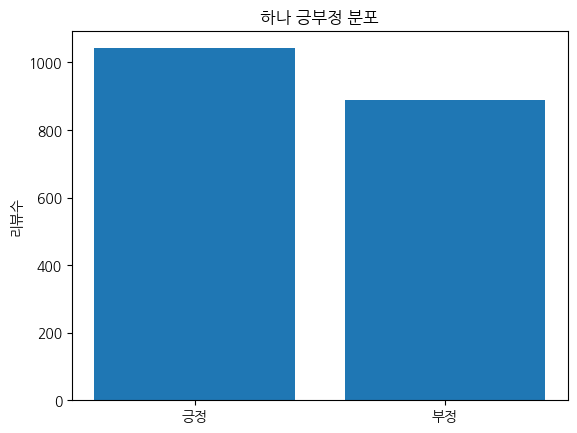

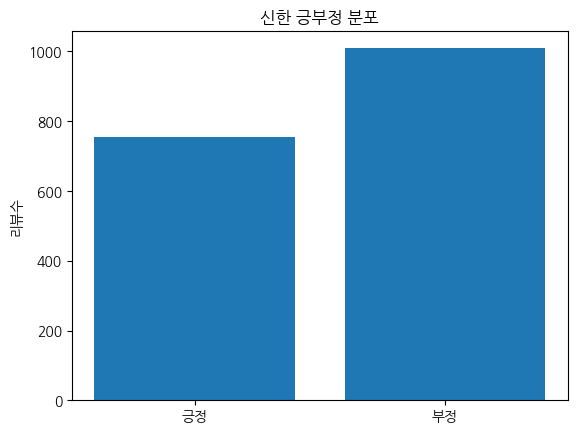

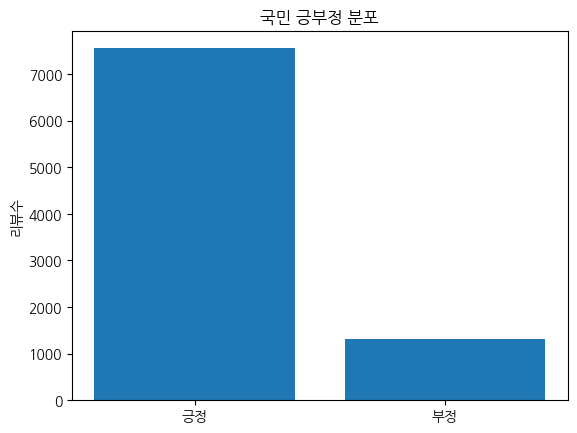

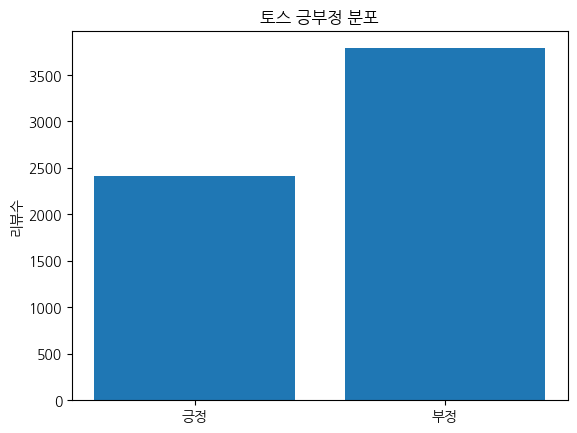

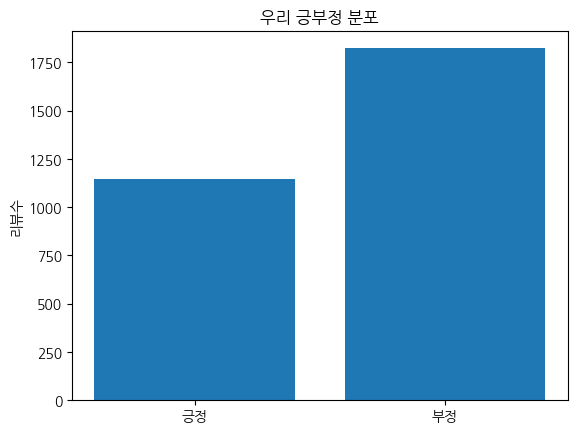

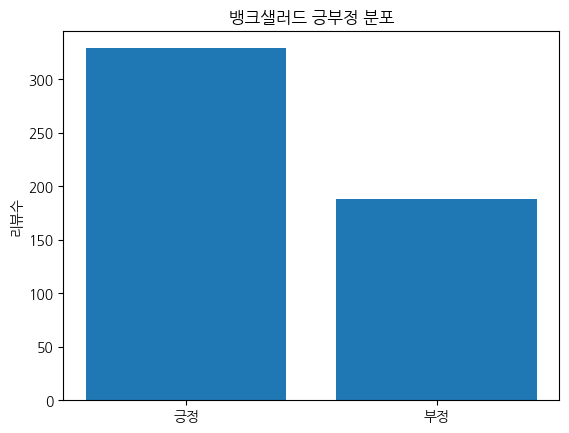

{'hana': {'pos':               리뷰일  평점                                              사용자리뷰 은행명  \
  0      2023-12-21   5        엄빠 폰에 설치해드렸는데 두분 다 쓰기 편하다고 하시네요 ㅎㅎ 저도 쓰고있음!  하나   
  27     2024-05-07   4  Not Found 실행이 안됩니다 하나은행 어플 누르면 Not Found 메세지 뜨...  하나   
  58     2024-09-05   5    뱅킹. 잘. 이용하고. 있어요. 항상친절. 하게 설명. 해 주셔서. 감사. 수고하세요  하나   
  59     2024-03-15   5                                             잘쓰고잇어용  하나   
  66     2024-11-30   5                                             감사합니다!  하나   
  ...           ...  ..                                                ...  ..   
  22120  2024-10-11   5                    입, 출, 현황을 확인할 수 있어 매우 편리하고 좋아요.  하나   
  22165  2023-10-11   5                                        최고입니다 감사합니다  하나   
  22196  2024-12-30   5                                         감사합니다?????  하나   
  22202  2023-07-03   5                                           간편하고 좋네요  하나   
  22214  2023-06-14   5                                                좋아요  하나   
 

In [15]:
pos_neg_dict = {}
for bank, bank_eng in bank_list_dict.items():
#     print(bank, bank_eng)
    pos = train_df[(train_df['은행명'] == bank) & (train_df['긍정'] == 1)]
    neg = train_df[(train_df['은행명'] == bank) & (train_df['긍정'] == 0)]
    pos_neg_dict[bank_eng] = dict(pos=pos, neg=neg)
    
    # 은행별 긍정/부정리뷰 비율 시각화
    plt.bar(['긍정', '부정'], [pos.shape[0], neg.shape[0]])
    plt.title(f"{bank} 긍부정 분포")
    plt.ylabel("리뷰수")
    plt.show()
    
    
pos_neg_dict

모든 데이터 프레임에서 특수문자 제거하기

In [16]:
import re

In [17]:
def text_clean(x):
    # 한글, 영문대소문자, 숫자만 남기고 모두 제거
    cleaned = re.sub(r'[^가-힣a-zA-Z0-9]', " ", x)
    cleaned = cleaned.replace("  ", " ").replace("  ", " ").strip()
    return cleaned

In [18]:
for bank_eng, pn in pos_neg_dict.items():
    for key in ['pos', 'neg']:
        df = pn[key]
        df.loc[:, '사용자리뷰'] = df['사용자리뷰'].apply(text_clean)
        pos_neg_dict[bank_eng][key] = df

In [19]:
pos_neg_dict['toss']['neg']

,리뷰일,평점,사용자리뷰,은행명,긍정
3,2024-09-01,1,카드 충천이 안됌,토스,0
5,2025-01-01,1,토스쇼핑 맘카페에서 피해자 올라온것 보니 교묘하게 사기치고 하는 판매자 있는데 관리...,토스,0
6,2025-03-23,3,고양이키우기 쿠폰 유효기간 6일 넘 한거 아닌가요,토스,0
8,2024-01-05,1,제가 토스 계좌에 돈이 좀 남아있는 상황에서 핸드폰이 고장나 핸드폰을 초기화 했는데...,토스,0
10,2025-02-28,1,고양이 놀기 광고 더 붙음,토스,0
...,...,...,...,...,...
22210,2023-12-05,1,이젠 하다하다 캐릭터 소장 500원 됐네 100원일땐 오히려 만원정도야 쓸만하네 이...,토스,0
22222,2024-04-21,3,점점 토스가 야박해지네요 토스포인트 인출할때도 수수료가 비싸고 친구랑 토스켜기도 금...,토스,0
22230,2023-06-15,2,프로그램 오류가 매우 많아서 쓰기 매우 불편하다 위치 설정 안한다 고 하면 안내풍선...,토스,0
22237,2023-08-17,1,라이브방송으로 포인트잘모았는데 요즘은 별로 시스템이 점점 포인트를 안주려고하는듯 라...,토스,0


# 은행별 긍부정 리뷰 워드클라우드 만들기

In [20]:
!pip install wordcloud

# 🌀 워드클라우드(WordCloud) 만들기 
한국어 리뷰 데이터 분석 + 시각화

---

## 1. 워드클라우드란?

- 텍스트 데이터에서 **단어의 등장 빈도수**를 기준으로  
  단어 크기·배치·색상을 다르게 표현하는 시각화 기법이다.
- 등장 빈도가 높을수록 크게, 낮을수록 작게 표시된다.
- 리뷰, 설문, 댓글, SNS 데이터의 **핵심 키워드 탐색**에 매우 효과적이다.

---

## 2. 라이브러리 설치

```bash
pip install wordcloud
```

# ⚠️ 한국어 워드클라우드(font_path 필수)  
한국어 워드클라우드를 만들 때는 반드시 **font_path** 옵션을 지정해야 한다.  
지정하지 않으면 한글이 깨지거나 네모(□)로 출력된다.

---

# 3. 작업 흐름 개요

1. **텍스트 데이터 준비**  
   - pandas Series → 리스트(list) → 하나의 긴 문자열로 합치기

2. **텍스트 정제(전처리)**  
   - 정규표현식으로 특수문자 제거  
   - 필요 시 소문자 변환, 공백 정리 등 추가 처리

3. **한국어 형태소 분석으로 명사 추출**  
   - MeCab, Okt, Komoran 등  
   - 워드클라우드는 명사 위주로 작성하는 것이 가장 효과적

4. **불용어(stopwords) 제거**  
   - ‘은행’, ‘앱’, ‘어플’ 같은 너무 일반적인 단어 제거  
   - 브랜드명(하나, 국민, 신한 등)도 필요 시 제거

5. **단어 빈도수 계산 (Counter)**  
   - Counter(filtered_words) 형태로 {단어: 등장 횟수} 사전(dictionary) 생성

6. **WordCloud 옵션 지정**  
   - font_path  
   - width / height  
   - background_color  
   - max_words, max_font_size 등  
   - 필요 시 colormap, mask 옵션 설정

7. **generate_from_frequencies()로 워드클라우드 생성**

8. **시각화 및 파일 저장**  
   - matplotlib으로 표시  
   - .png 파일로 저장 가능

---

# 4. 텍스트 데이터 준비 + 전처리

## 4.1 텍스트 합치기

리뷰가 Series 형태라면 다음과 같이 리스트로 변환 후 하나의 문자열로 합칠 수 있다.

```python
# 리뷰 Series → 리스트 → 하나의 문자열로 변환
text_data = df['사용자리뷰'].astype(str).tolist()
full_text = " ".join(text_data)
```
* .astype(str) : NaN/None 발생 시 안전하게 문자열 변환
* .tolist() : pandas Series → Python list
* " ".join(list) : 하나의 긴 문자열로 연결

## 4.2 텍스트 정제(전처리)

정규표현식을 사용해 한글/숫자/알파벳만 남기고 나머지를 제거한다.
```python
import re

def text_clean(x):
    pattern = r'[가-힣0-9a-zA-Z]+'
    matches = re.findall(pattern, str(x))
    return " ".join(matches)

# 전처리 적용
df['사용자리뷰'] = df['사용자리뷰'].astype(str).apply(text_clean)

```
* [가-힣0-9a-zA-Z]+ : 한글 전체 + 숫자 + 영어만 추출
* 리뷰 문장에서 이모지, 특수문자, 기호 등을 제거해 깔끔한 텍스트 확보

## 5. 형태소 분석 + 불용어 제거

한국어 텍스트는 공백 기반 토큰화가 어렵기 때문에 **MeCab 등 형태소 분석기로 명사만 추출**하는 방식이 가장 효과적이다.

### 5.1 MeCab 명사 추출

```python
from konlpy.tag import Mecab
mecab = Mecab()
nouns = mecab.nouns(full_text)
```

---

### 5.2 불용어(stopwords) 정의

```python
stopwords = set([
    '은행', '어플', '뱅킹', '앱', '서비스', '고객',
    '하나', '국민', '신한', '우리',
    'toss', '카드'
])
```

---

### 5.3 불용어 제거 + 한 글자 단어 제거

```python
filtered = [
    word for word in nouns
    if len(word) > 1 and word not in stopwords
]
```

---

## 6. 단어 빈도 계산

```python
from collections import Counter
word_freq = Counter(filtered)
```

---

## 7. WordCloud 옵션 상세 설명

```python
from wordcloud import WordCloud

wc = WordCloud(
    font_path="NanumGothic.ttf",
    background_color="white",
    width=800, height=400,
    max_words=200,
    max_font_size=120,
    min_font_size=4,
    colormap="tab10",
    prefer_horizontal=0.9,
    scale=2,
    stopwords=None,
    mask=None,
    contour_width=0,
    contour_color='black'
)
```

| 옵션 | 의미 |
|------|------|
| font_path | 한글 폰트 경로 |
| background_color | 배경색 |
| width/height | 이미지 크기 |
| max_words | 최대 단어 수 |
| max_font_size | 글자 최대 크기 |
| min_font_size | 글자 최소 크기 |
| colormap | 색상 팔레트 |
| prefer_horizontal | 가로 배치 비율 |
| scale | 고해상도 렌더링 배율 |
| mask | 특정 모양 마스크 |
| contour_width/color | 외곽선 효과 |

---

## 8. generate() vs generate_from_frequencies()

### generate(text)

```python
wc.generate(full_text)
```

---

### generate_from_frequencies(freq_dict)

```python
wc.generate_from_frequencies(word_freq)
```

> 한국어 분석에서는 **generate_from_frequencies()** 방식이 훨씬 정확하다.



# 반복문으로 은행별 만족/불만족 워드클라우드 그리기

In [21]:
from wordcloud import WordCloud

In [22]:
from konlpy.tag import Mecab
mecab = Mecab()

In [23]:
full_text = " ".join(pos_neg_dict['hana']['pos']['사용자리뷰'].tolist())

In [24]:
stopwords = set(['은행', '어플', '뱅킹', '앱', '하나', 'toss', '국민', '토스'
                 '뱅크샐러드','신한', '서비스','고객','카드', '신한은행', '국민은행', '하나은행', '토스뱅크'])

In [25]:
# full_text에서 명사만 추출
nouns = mecab.nouns(full_text)
filtered = [word for word in nouns if len(word) > 1 and word not in stopwords]
# filtered

단어의 빈도 계산 collections의 counter로 계산

In [26]:
from collections import Counter

In [27]:
word_freq = Counter(filtered)
word_freq

Counter({'편리': 170,
         '사용': 134,
         '감사': 53,
         '가입': 40,
         '이용': 35,
         '만족': 33,
         '계좌': 31,
         '최고': 30,
         '거래': 27,
         '친절': 26,
         '설명': 21,
         '불편': 18,
         '이체': 17,
         '상품': 17,
         '처리': 16,
         '업데이트': 15,
         '번호': 14,
         '가능': 14,
         '인증': 14,
         '설치': 13,
         '적금': 13,
         '기능': 13,
         '통장': 12,
         '이벤트': 12,
         '금융': 12,
         '오류': 12,
         '확인': 11,
         '대출': 11,
         '해결': 11,
         '시간': 11,
         '정보': 10,
         '상태': 10,
         '추천': 10,
         '직관': 9,
         '개선': 9,
         '변경': 9,
         '이해': 9,
         '화면': 9,
         '정확': 9,
         '혜택': 9,
         '조아': 8,
         '문제': 8,
         '처음': 8,
         '입출금': 8,
         '메뉴': 8,
         '때문': 8,
         '생각': 8,
         '방문': 8,
         '실행': 7,
         '이상': 7,
         '상담원': 7,
         '경우': 7,
         '관리': 7,
      

워드 클라우드 그리기

In [28]:
wc = WordCloud(
        font_path='NanumGothic.ttf',
        background_color='white',
        width=800,
        height=400).generate_from_frequencies(word_freq)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("하나은행 긍정 사용자 리뷰")
plt.show()

OSError: cannot open resource

반복문으로 전체 데이터 워드클라우드 만들기

In [29]:
for bank_eng, pn in pos_neg_dict.items():
    for label, df in pn.items():
#         print(bank_eng, label)
#         display(df)
        full_text = " ".join(df['사용자리뷰'].tolist())
        # full_text에서 명사만 추출
        nouns = mecab.nouns(full_text)
        # stopword 제외 후 다시 합침
        filtered = [word for word in nouns if len(word) > 1 and word not in stopwords]
        # 단어의 빈도 계산
        word_freq = Counter(filtered)
        
        # wordcloud 그리기
        wc = WordCloud(
        font_path='NanumGothic.ttf',
        background_color='white',
        width=800,
        height=400).generate_from_frequencies(word_freq)
        plt.figure(figsize=(10,5))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"{bank_eng} {label} 사용자 리뷰")
        save_name = f"./data/{bank_eng}_{label}_사용자리뷰.png"
        plt.savefig(save_name, dpi=300, bbox_inches='tight')
        plt.show()
        

        

OSError: cannot open resource

# 📘 LDA 기반 최적 토픽 추출 (토픽 모델링)
### ― 한국어 리뷰 + Mecab 형태소 분석 + gensim Coherence 기반 토픽 개수 최적화 ―
* LDA는 문서 집합에서 주제를 추출하는 토픽모델링 기법
* 각 문서(리뷰 1개)는 여러 주제들로 구성되어 있고, 각 주제는 특정 단어들의 분포로 표현된다는 베이지안 확률에 기반


## 1. 토픽 모델링(Topic Modeling)이란?

토픽 모델링은 **문서 집합 속에 숨어 있는 주제(Topic)들을 자동으로 발견하는 비지도 학습 기법**이다.   
텍스트 데이터(예: 상품 리뷰, 설문 답변, 고객 불만 글 등)에 라벨이 없어도, 텍스트 내부 패턴을 분석해 문서들이 어떤 주제들을 중심으로 구성되어 있는지 스스로 찾아낸다.

### ✔️ 토픽 모델링의 핵심 특징
- 지도학습이 아닌 **비지도 학습(Unsupervised)**  
- 단어들의 **동시 등장 패턴(co-occurrence)** 을 기반으로 주제를 추론  
- 하나의 문서는 **복수의 토픽으로 구성될 수 있음**  
- 각 토픽은 특정 단어가 높은 확률로 등장하는 **단어 확률 분포**로 표현됨



## 2. LDA(Latent Dirichlet Allocation)의 개념

LDA는 토픽 모델링을 위한 가장 대표적이고 고전적인 확률 기반 모델이다.  
문서가 “토픽들의 혼합물”이고, 각 토픽은 “단어들의 혼합물”이라는 가정 위에서 작동한다.

### ✔️ LDA의 기본 가정
1. **각 문서(doc)는 여러 토픽(topic)들의 확률적 혼합물이다.**  
   - 예: 30% 품질 관련 토픽, 50% 가격 관련 토픽, 20% 배송 관련 토픽

2. **각 토픽(topic)은 특정 단어들의 확률 분포이다.**  
   - 예: “배송” 토픽 → {배송, 빠름, 느림, 기사, 택배, …}

3. **문서 생성 과정(확률적 모델링)**
   - 문서마다 “토픽 분포”를 하나 샘플링  
   - 해당 토픽 분포에서 특정 토픽을 선택  
   - 토픽이 가진 “단어 분포”에서 단어 하나를 선택  
   - 이 과정을 반복해 문서 전체의 단어들을 생성했다고 가정

LDA는 이 “문서 생성 과정”을 역으로 추론하여:
- 어떤 토픽들이 문서 집합 속에 존재하는지  
- 각 토픽은 어떤 단어들로 구성되는지  
- 각 문서는 어떤 토픽들로 구성되어 있는지  

를 계산해준다.



## 3. 한국어 리뷰에서 LDA를 적용할 때의 특징

한국어는 영어와 달리 **형태소 기반 언어**이다.  
따라서 LDA를 적용하기 전에 “형태소 분석기”를 활용한 전처리가 필수적이다.

### ✔️ 한국어 처리의 핵심 단계
1. **형태소 분석(Mecab 등)**  
   - 문장을 “단어(형태소)” 단위로 쪼개고 품사 태깅  
   - 명사(NNG, NNP), 형용사(VA), 동사 어간 등 주요 정보만 추출

2. **불용어(stopwords) 제거**  
   - 의미 없는 단어(하다, 되다, 있다, 너무, 그리고…) 제거  
   - 데이터 도메인(쇼핑, 은행, 리뷰 등)에 맞춰 커스터마이징

3. **단어 리스트 생성**  
   - LDA는 단어의 등장 빈도를 기반으로 하므로,  
     “의미 있는 단어만 남긴 리스트”가 모델 성능의 핵심

4. **BoW(Bag-of-Words) 기반 표현 생성**  
   - 각 문서에서 단어가 몇 번 등장했는지 정수 형태로 표현  
   - LDA는 BoW 또는 TF-IDF 형태를 입력으로 사용



## 4. gensim의 Dictionary와 Corpus

### ✔️ Dictionary
- 전체 문서의 단어들을 수집하여  
  **“단어 → 고유 id”** 매핑을 만든 구조  
- LDA 입력의 필수 요소

### ✔️ Corpus
- 각 문서를  
  **[(단어 id, 단어 등장 횟수), …]**  
  형태로 표현한 리스트
- LDA 모델은 이 Corpus를 기반으로 학습한다.

이 두 구조는 LDA의 입력 역할을 하며, 모델이 문서-단어 관계를 수학적으로 계산할 수 있도록 해준다.



## 5. 토픽 수(k)는 왜 최적화를 해야 할까?

LDA는 **토픽 개수를 자동으로 결정하지 못하는 모델**이다.  
사용자가 직접 **몇 개의 토픽을 만들 것인지(k)** 를 지정해야 한다.

### ✔️ 토픽 수를 잘못 선택하면?
- 너무 적으면: 각 주제가 과도하게 뭉뚱그려짐  
- 너무 많으면: 의미 없는 쪼개진 토픽이 다수 생성됨  
- 적절한 k 선택이 필수

### ✔️ 토픽 개수 평가 지표: Coherence Score
Coherence는 **토픽 내 단어들이 서로 얼마나 의미적으로 관련성이 높은지** 판단하는 지표다.

예를 들어:
- 토픽 단어가 {배송, 택배, 기사, 빠름, 도착} → 일관성 높음  
- 토픽 단어가 {배송, 맛있다, 친절, 가격, 프로그램} → 일관성 낮음  

Coherence 점수는 “사람이 보기에 자연스러운 토픽”일수록 높은 값을 갖는다.  
따라서 **여러 개의 k를 실험하고 Coherence가 가장 높은 값을 선택하는 방식**이 일반적이다.



## 6. 최적 토픽 개수 산출 과정 (개념)

최적 k를 찾는 과정은 다음과 같다.

---

### **① 사전(Dictionary)과 코퍼스(Corpus) 준비**  
- 전처리된 토큰 리스트 → Dictionary 생성  
- 각 문서 → Bag-of-Words 형태로 Corpus 생성  

---

### **② 다양한 토픽 수(k)에 대해 LDA 모델 반복 학습**  
- k = 2, 3, 4, … 10 (혹은 2~20 등 원하는 범위)  
- 각 k에 대해 LDA 모델 1개씩 학습  
- 동일한 데이터, 동일한 전처리 조건에서 실험

---

### **③ 각 LDA 모델의 Coherence Score 계산**

Coherence는 gensim의 CoherenceModel에서 제공하며,  
다음 요소를 기반으로 계산된다:

- 각 토픽의 상위 단어들  
- 단어들 간의 동시 등장 통계  
- 단어 벡터 공간에서의 의미적 유사성  
- 사람이 이해하기 쉬운 토픽 구성인지 평가하는 개념적 메트릭

---

### **④ 토픽 수별 Coherence 점수를 비교하여 최적 k 선택**

예시(개념):

| 토픽 수(k) | Coherence |
|------------|-----------|
| 3 | 0.43 |
| 4 | 0.56 |
| 5 | **0.61 (최고)** |
| 6 | 0.59 |
| 7 | 0.57 |

→ 최적 토픽 수는 **k=5**  

이런 방식으로 최적 토픽 개수를 자동적으로 결정한다.



## 7. 최종 LDA 모델 해석

최적 k가 결정되면, 해당 k로 LDA를 재학습하고 다음을 분석한다.

---

### ✔️ (1) 토픽 정의하기  
각 토픽의 **상위 단어**(Top-N words)를 기반으로 토픽의 의미를 해석한다.

예시(개념):

- 토픽 0 → 배송, 빠름, 기사, 도착, 택배  
- 토픽 1 → 가격, 할인, 이벤트, 세일  
- 토픽 2 → 품질, 제품, 내구성, 고장, 불량  

---

### ✔️ (2) 각 문서의 토픽 분포  
문서마다 “토픽 혼합 비율”이 계산된다.

예시:

| 문서 | 토픽0 | 토픽1 | 토픽2 | 대표 토픽 |
|------|-------|-------|-------|------------|
| A | 0.65 | 0.20 | 0.15 | 토픽0 |
| B | 0.10 | 0.70 | 0.20 | 토픽1 |
| C | 0.05 | 0.15 | 0.80 | 토픽2 |

- 비율이 가장 높은 토픽이 “해당 문서의 대표 토픽”  
- 문서별 대표 토픽을 활용하면 **리뷰 분류**나 **이슈 클러스터링**이 가능

---

### ✔️ (3) 비즈니스/실무 활용

- 리뷰 토픽별 분류 → **고객 VOC 분석 자동화**  
- 기간별 토픽 변화 → **이슈 변화 추적(Dashboard)**  
- 긍정/부정 리뷰로 나누어 LDA → **What customers like / dislike** 자동 추출  
- 마케팅/기능 개선 → **주요 고객 불만 토픽 파악**



## 8. LDA의 주요 하이퍼파라미터 개념적 이해

### 🔷 num_topics  
- 생성할 토픽 개수  
- Coherence 기반으로 자동 선택 가능  

### 🔷 passes  
- 전체 코퍼스를 몇 번 반복해서 학습할지  
- 클수록 수렴이 잘 되나 시간 증가  

### 🔷 chunksize  
- 한 번에 처리하는 문서 수  
- 메모리/속도 조절 목적  

### 🔷 alpha (문서-토픽 분포의 희소성)  
- 작으면: 한 문서에 소수의 토픽만 등장  
- 크면: 문서에 다양한 토픽이 골고루 등장  

### 🔷 eta (토픽-단어 분포의 희소성)  
- 작으면: 토픽이 소수 단어에 집중  
- 크면: 토픽이 다양한 단어를 고르게 포함  
- ‘auto’ 사용 시 gensim이 적절하게 추정  



## 9. LDA 기반 최적 토픽 모델링의 전체 프로세스 요약

1. **데이터 수집**
   - 리뷰, 댓글, 코멘트 등

2. **텍스트 전처리**
   - 불필요한 기호, 숫자, 이모지 제거  
   - 한글 정규화

3. **형태소 분석 (Mecab)**
   - 명사/형용사 등 의미 있는 단어만 추출  
   - 불용어 제거

4. **Dictionary 생성**
   - 전체 단어 → 고유 ID 매핑

5. **Corpus 생성**
   - 문서 → BoW 구조

6. **토픽 수(k)를 2~N까지 범위로 설정하여 LDA 반복 학습**

7. **각 k에 대해 Coherence Score 계산**

8. **Coherence가 가장 높은 k 선택 → 최적 토픽 수 결정**

9. **최적 k로 LDA 재학습**

10. **토픽 상위 단어 확인 후 토픽 의미 해석**

11. **문서별 대표 토픽 추출 및 활용**



## 10. 정리

LDA 기반 토픽 모델링은  
- 대규모 텍스트 데이터를 **자동으로 요약**하고  
- 리뷰/코멘트 등을 **토픽 단위로 구조화**하여  
- **비즈니스 인사이트 도출**을 가능하게 하는 강력한 분석 기법이다.

특히 한국어 데이터에서는  
- Mecab 기반 형태소 분석  
- 불용어 제거  
- 코퍼스 구조화  
이 필수적이며,  
최적 토픽 개수는 **Coherence Score**를 활용해 객관적으로 선택할 수 있다.


# 최적 토픽 개수 구하고 리뷰에서 토픽 추출하기
* gensim 모듈 사용
* mecab을 이용해서 형태소 분리 후 벡터화
* coherence 점수를 계산해서 최적 토픽 개수 산출

In [30]:
!pip install gensim 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 16.2 MB/s  0:00:01m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [gensim]2m2/3 [gensim]pen]


In [32]:
from gensim.models import CoherenceModel
from gensim import corpora
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [33]:
# mecab 으로 명사만 추출해서 길이가 2 이상인 것만 모아서 리스트로 만드는 함수
def tokenize_texts(texts):
    return [[word for word in mecab.nouns(doc) if len(word) > 1] for doc in texts]

In [34]:
# result = []
# for doc in texts:
#     for word in mecab.nouns(doc):
#         if len(word) > 1
#             result.append(word)

In [35]:
def find_optimal_topics(texts, start=2, end=8):
    # texts는 문자열 리스트
    tokenized_texts = tokenize_texts(texts)
    if not tokenized_texts:
        return start
    # gensim으로 BoW(숫자로 인코딩 된 단어 모음)
    dictionary = corpora.Dictionary(tokenized_texts)
    vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False)
    
    try:
        doc_term_matrix = vectorizer.fit_transform(tokenized_texts)
    except:
        print("벡터화중 오류발생, 기본 토픽 수 2개 반환")
        return start
    
    best_score = -1
    best_n = start
    
    # LDA 분석
    for n_topics in range(start, end+1):
        lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
        lda_model.fit(doc_term_matrix)
        
        feature_names = vectorizer.get_feature_names_out()
        # 상위 10개의 단어를 순서대로 추출
        topics = [[feature_names[i] for i in topic.argsort()[:-11:-1]] for topic in lda_model.components_]
        
        # 응집도 계산
        cm = CoherenceModel(topics=topics, texts=tokenized_texts, dictionary=dictionary, coherence="c_v")
        score = cm.get_coherence()
        print(f"토픽수: {n_topics}, Coherence Score: {score:.4f}")
        
        if score > best_score:
            best_score = score
            best_n = n_topics
    
    print(f"최적 토픽수: {best_n} (Score: {best_score:.4f})")
    return best_n
        

# LDA 토픽 모델링 시작

In [36]:
import pandas as pd

In [37]:
for bank_eng, pn in pos_neg_dict.items():
    # pos/neg 결합
    combined_df = pd.concat([pn['pos'], pn['neg']], ignore_index=True)
    df = combined_df['사용자리뷰']
    for senti in pn:
        df = pn[senti]['사용자리뷰']
    
        # 리뷰 수 체크 20개 초과
        if len(df) < 20:
            print(f"{bank_eng} 리뷰수 부족 ({len(df)}개) - 스킵")
            continue

        texts = df.tolist()

        # 최적 토픽 수 계산
        best_k = find_optimal_topics(texts)

        vectorizer = CountVectorizer(max_df=0.9, min_df=10)
        review_vec = vectorizer.fit_transform(df)

        if review_vec.shape[1] == 0:
            print(f"{bank_eng} min_df=10 조건 만족 단어 없음 - 스킵")
            continue

        lda = LatentDirichletAllocation(n_components=best_k, random_state=42)
        lda.fit(review_vec)

        words = vectorizer.get_feature_names_out()

        print(f"\n{bank_eng} {senti} 토픽 {best_k}개 - 상위 단어")
        print("=" * 100)
        for i, topic in enumerate(lda.components_):
            top = [words[idx] for idx in topic.argsort()[-10:]]
            print(f"토픽 #{i}: {top}\n")

    print("=" *30, "토픽 모델링 종료", "=" *30)
    

/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.2459
토픽수: 3, Coherence Score: 0.3418
토픽수: 4, Coherence Score: 0.3457
토픽수: 5, Coherence Score: 0.3132
토픽수: 6, Coherence Score: 0.3724
토픽수: 7, Coherence Score: 0.3521
토픽수: 8, Coherence Score: 0.3613
최적 토픽수: 6 (Score: 0.3724)

hana pos 토픽 6개 - 상위 단어
토픽 #0: ['좋은', '바로', '편해요', '매우', '편하고', '너무', '좋습니다', '사용하기', '편리하고', '좋아요']

토픽 #1: ['쓰고', '있어요', '매우', '사용하고', '편리하게', '좋네요', '쉽게', '다른', '편하게', '은행']

토픽 #2: ['있어서', '좋아요', '매우', '쉽고', '좋은', '최고', '쓰고', '있어요', '간편하고', '아주']

토픽 #3: ['좋은', '사용하고', '쉽고', '앱이', '바로', '많이', '빠르고', '만족합니다', '편리합니다', '편리해요']

토픽 #4: ['하나원큐', '있어서', '간편하고', '빠르고', '좋은', '정말', 'good', '편해요', '감사합니다', '좋아요']

토픽 #5: ['사용하고', '편리하게', '합니다', '하나원큐', '갑자기', '편리함', '있어서', '있습니다', '좋음', '하나은행']



/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.6140
토픽수: 3, Coherence Score: 0.5810
토픽수: 4, Coherence Score: 0.5029
토픽수: 5, Coherence Score: 0.5244
토픽수: 6, Coherence Score: 0.5223
토픽수: 7, Coherence Score: 0.4778
토픽수: 8, Coherence Score: 0.5079
최적 토픽수: 2 (Score: 0.6140)

hana neg 토픽 2개 - 상위 단어
토픽 #0: ['자꾸', '실행이', '하나은행', '안되고', '안됨', '은행', '앱이', '다른', '어플', '계속']

토픽 #1: ['인증', '하고', '업데이트', 'not', '너무', '간편인증', '로그인', '갑자기', '진짜', '다시']

============================== 토픽 모델링 종료 ==============================


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.3684
토픽수: 3, Coherence Score: 0.3878
토픽수: 4, Coherence Score: 0.4030
토픽수: 5, Coherence Score: 0.4365
토픽수: 6, Coherence Score: 0.4406
토픽수: 7, Coherence Score: 0.3807
토픽수: 8, Coherence Score: 0.3888
최적 토픽수: 6 (Score: 0.4406)

shinhan pos 토픽 6개 - 상위 단어
토픽 #0: ['신한은행', '편해요', '편리하고', '편하고', '너무', '있어요', '좋습니다', '정말', '사용하기', '신한']

토픽 #1: ['사용', '있어요', '정말', '너무', '신한은행', '편하고', '아주', '빠르고', '편리하고', '좋아요']

토픽 #2: ['빠르고', '은행', '업데이트', '정말', '신한은행', '아주', '편리하고', '사용', '좋습니다', '있습니다']

토픽 #3: ['사용하기', '아주', '있습니다', '좋아요', '좋습니다', '빠르고', '있어요', '편하고', '신한은행', '너무']

토픽 #4: ['사용하기', '빠르고', '정말', '신한', '편리하고', '신한은행', '최고', '좋은', '은행', '감사합니다']

토픽 #5: ['정말', '있어요', '좋아요', '사용하기', '너무', '아주', '빠르고', '업데이트', '편해요', '포인트']



/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.5028
토픽수: 3, Coherence Score: 0.5506
토픽수: 4, Coherence Score: 0.5671
토픽수: 5, Coherence Score: 0.5610
토픽수: 6, Coherence Score: 0.5176
토픽수: 7, Coherence Score: 0.5061
토픽수: 8, Coherence Score: 0.5613
최적 토픽수: 4 (Score: 0.5671)

shinhan neg 토픽 4개 - 상위 단어
토픽 #0: ['앱은', '너무', '다른', '이런', '입출금', '해도', '이거', '은행', '그냥', '어플']

토픽 #1: ['갑자기', '신한', '앱이', '다른', '업데이트', '다시', '자꾸', '아니', '로그인', '신한은행']

토픽 #2: ['들어가면', '다시', '인증서', '안됩니다', '어플이', '안되네요', '카드', '신분증', '진짜', '계속']

토픽 #3: ['다시', '비대면', '휴대폰', '안되고', '신분증', '오류가', '하고', '안됨', '인증', '너무']

============================== 토픽 모델링 종료 ==============================


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4597
토픽수: 3, Coherence Score: 0.4853
토픽수: 4, Coherence Score: 0.4579
토픽수: 5, Coherence Score: 0.4452
토픽수: 6, Coherence Score: 0.4118
토픽수: 7, Coherence Score: 0.3918
토픽수: 8, Coherence Score: 0.3669
최적 토픽수: 3 (Score: 0.4853)

kb pos 토픽 3개 - 상위 단어
토픽 #0: ['정말', '좋음', '쉬워요', '있어서', '있어', '은행', '너무', '좋네요', '쉽게', '좋습니다']

토픽 #1: ['사용하고', '편하게', '있어요', '편리하게', '있습니다', '편하고', '아주', '빠르고', '편리합니다', '좋아요']

토픽 #2: ['편리함', '사용이', '너무', '쉽고', '만족합니다', '편리하고', '감사합니다', '편리해요', '편해요', '사용하기']



/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4468
토픽수: 3, Coherence Score: 0.4539
토픽수: 4, Coherence Score: 0.5895
토픽수: 5, Coherence Score: 0.4750
토픽수: 6, Coherence Score: 0.4952
토픽수: 7, Coherence Score: 0.5114
토픽수: 8, Coherence Score: 0.5505
최적 토픽수: 4 (Score: 0.5895)

kb neg 토픽 4개 - 상위 단어
토픽 #0: ['안되고', '이렇게', '하고', '계속', '은행', '그냥', '다른', '인증서', '로그인', '진짜']

토픽 #1: ['신분증', '알림을', '했는데', '오류가', '너무', '알림이', '입출금', '알림', '다시', '계속']

토픽 #2: ['어플', '좋아요', '측정이', '걷기', '안됨', '쓰레기', '갑자기', '신분증', '안됩니다', '걸음수']

토픽 #3: ['지금', '다시', '제대로', '너무', '업데이트', '어떻게', '접속이', '안되고', '앱이', '안되네요']

============================== 토픽 모델링 종료 ==============================


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.5043
토픽수: 3, Coherence Score: 0.6185
토픽수: 4, Coherence Score: 0.5343
토픽수: 5, Coherence Score: 0.5463
토픽수: 6, Coherence Score: 0.5447
토픽수: 7, Coherence Score: 0.5392
토픽수: 8, Coherence Score: 0.4885
최적 토픽수: 3 (Score: 0.6185)

toss pos 토픽 3개 - 상위 단어
토픽 #0: ['편하고', '바로', '하고', '했는데', '업데이트', '갑자기', '토스', '계속', '감사합니다', '다시']

토픽 #1: ['토스', '많이', '편리하고', '교통카드', '주식', '좋겠어요', '좋은데', '좋습니다', '다른', '좋아요']

토픽 #2: ['사용하고', '근데', '제가', '있는', '좋겠습니다', '정말', '쓰고', '있습니다', '토스', '너무']



/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.3696
토픽수: 3, Coherence Score: 0.4211
토픽수: 4, Coherence Score: 0.3751
토픽수: 5, Coherence Score: 0.4311
토픽수: 6, Coherence Score: 0.4573
토픽수: 7, Coherence Score: 0.4970
토픽수: 8, Coherence Score: 0.4871
최적 토픽수: 7 (Score: 0.4970)

toss neg 토픽 7개 - 상위 단어
토픽 #0: ['증권', '어플', '토스증권', '광고를', '업데이트', '데이터', '동영상', '알림', '진짜', '광고']

토픽 #1: ['만보기가', '충전이', '수수료', '주식', '충전', '제대로', '카드', '포인트', '교통카드', '토스']

토픽 #2: ['제가', '없는데', '돈이', '이렇게', '그냥', '이벤트', '다시', '계속', '다른', '토스']

토픽 #3: ['토스를', '해주세요', '안되고', '안되네요', '진짜', '갑자기', '다시', '아니', '계속', '업데이트']

토픽 #4: ['기능', '광고', '이거', '미션', '진짜', '복권', '그냥', '포인트', '만보기', '너무']

토픽 #5: ['있습니다', '정말', '다시', '요즘', '앱이', '토스가', '갑자기', '많이', '토스', '너무']

토픽 #6: ['하고', '다시', '고양이', '다른', '계속', '지금', '오류가', '토스', '오늘', '자꾸']

============================== 토픽 모델링 종료 ==============================


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4170
토픽수: 3, Coherence Score: 0.4438
토픽수: 4, Coherence Score: 0.4351
토픽수: 5, Coherence Score: 0.4267
토픽수: 6, Coherence Score: 0.4404
토픽수: 7, Coherence Score: 0.4237
토픽수: 8, Coherence Score: 0.4305
최적 토픽수: 3 (Score: 0.4438)

woori pos 토픽 3개 - 상위 단어
토픽 #0: ['간편하고', '좋네요', '쉽고', '편하게', '편리함', '사용이', '아주', '만족합니다', '편리합니다', '편해요']

토픽 #1: ['편합니다', '좋은', '은행', '최고', '있어요', '있습니다', '쉽게', '있어서', '감사합니다', '우리은행']

토픽 #2: ['친절하고', '간편하게', '편리하게', '좋습니다', '너무', '편하고', '편리하고', '편리해요', '사용하기', '좋아요']



/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.5933
토픽수: 3, Coherence Score: 0.5562
토픽수: 4, Coherence Score: 0.5358
토픽수: 5, Coherence Score: 0.5383
토픽수: 6, Coherence Score: 0.5385
토픽수: 7, Coherence Score: 0.5506
토픽수: 8, Coherence Score: 0.5269
최적 토픽수: 2 (Score: 0.5933)

woori neg 토픽 2개 - 상위 단어
토픽 #0: ['아니', '하고', '무슨', '하는데', '계속', '앱이', '갑자기', '그냥', '로그인', '다시']

토픽 #1: ['안되고', '신분증', '은행', '우리은행', '다른', '어플', '인증서', '너무', '업데이트', '진짜']

============================== 토픽 모델링 종료 ==============================


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.5051
토픽수: 3, Coherence Score: 0.4617
토픽수: 4, Coherence Score: 0.4009
토픽수: 5, Coherence Score: 0.3725
토픽수: 6, Coherence Score: 0.4202
토픽수: 7, Coherence Score: 0.3889
토픽수: 8, Coherence Score: 0.4331
최적 토픽수: 2 (Score: 0.5051)

b_salad pos 토픽 2개 - 상위 단어
토픽 #0: ['좋은데', '기능', '있습니다', '같습니다', '너무', '있으면', '있는', '지출', '기능이', '좋겠습니다']

토픽 #1: ['같아요', '정말', '있어요', '다만', '너무', '좋겠어요', '있습니다', '혹시', '쓰고', '가계부']



/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.3429
토픽수: 3, Coherence Score: 0.3863
토픽수: 4, Coherence Score: 0.3205
토픽수: 5, Coherence Score: 0.3694
토픽수: 6, Coherence Score: 0.3652
토픽수: 7, Coherence Score: 0.3816
토픽수: 8, Coherence Score: 0.3636
최적 토픽수: 3 (Score: 0.3863)

b_salad neg 토픽 3개 - 상위 단어
토픽 #0: ['지출', '너무', '계속', '가계부', '다시', '앱이', '갑자기', '안되네요']

토픽 #1: ['안되네요', '갑자기', '지출', '계속', '앱이', '너무', '다시', '가계부']

토픽 #2: ['안되네요', '갑자기', '가계부', '앱이', '다시', '너무', '지출', '계속']

============================== 토픽 모델링 종료 ==============================


# LDA 기반 최적 토픽 추출 Word2vec 기반 t-SNE 시각화

## Word2Vec이란?

* **정의:** 단어를 **고정된 길이의 숫자 벡터(임베딩)**로 변환하는 기술이다.
* **핵심 원리 (분포 가설):** "비슷한 맥락(주변 단어)에서 등장하는 단어는 비슷한 의미를 가진다"고 가정한다.
* **작동:** AI가 문맥을 학습하여, 의미가 비슷한 단어들을 벡터 공간에서 **가까운 위치**에 배치한다.
* **학습 방식:**
    * **CBOW:** 주변 단어들로 **가운데 단어**를 예측한다. (빠름)
    * **Skip-gram:** 가운데 단어로 **주변 단어**들을 예측한다. (희귀 단어 학습에 유리)
* **벡터 특징:**
    * 단어 간 **유사도 계산**(코사인 유사도 등)이 가능하다.
    * 의미론적 **연산**이 가능하다. (예: `벡터("왕") - 벡터("남자") + 벡터("여자") ≈ 벡터("여왕")`)

---

### 💡 Word2Vec을 사용하는 이유 (LDA와 결합 시)

LDA가 **단어 빈도**를 기반으로 주제를 찾는다면, Word2Vec은 **단어 의미(문맥)**를 기반으로 한다.

이 두 가지를 결합하면, **LDA로 추출한 주제(토픽) 단어들이 실제로 서로 얼마나 의미적으로 가까운지**를 Word2Vec을 통해 분석하고 시각화할 수 있다.

---

## TSNE (t-SNE)란?

* **정의:** **고차원**의 복잡한 데이터(예: Word2Vec의 100차원 벡터)를 사람이 눈으로 볼 수 있는 **저차원(주로 2D)**으로 압축해 보여주는 **시각화 기술**이다.
* **핵심 원리:** 원래의 고차원 공간에서 **가까웠던 데이터(단어)들**은, 차원을 줄인 2D 공간에서도 **계속 가까이 모여 있도록** 배치한다.
* **주요 용도:** Word2Vec으로 만들어진 수백 차원의 단어 벡터들을 2D 평면에 점으로 찍어, **단어들이 어떻게 그룹(군집)을 이루는지** 눈으로 쉽게 확인하게 해준다.

---

## Gensim corpora.Dictionary

* **정의:** 텍스트(단어)를 **정수 ID**로, 또는 정수 ID를 다시 단어로 변환하는 **"단어 ↔ 정수 ID" 매핑 사전**이다.
    * 예: `{"배송": 0, "가격": 1, "품질": 2}`
* **주요 용도:**
    1.  AI 모델(LDA 등)이 텍스트를 처리할 수 있도록 숫자 형식(Bag of Words)으로 변환할 때 사용된다.
    2.  `CoherenceModel`(주제 일관성 점수)을 계산할 때 이 매핑 정보가 필요하다.

In [52]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.6/620.6 MB 10.1 MB/s  0:00:39m0:00:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 20.9 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 19.1 MB/s  0:00:00m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 16.0 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 16.7 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 22.8 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 25.8 MB/s  0:00:00m0:00:0100:01


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23/23 [tensorflow]3 [tensorflow]-py]


# (LDA + Word2Vec + 2D t-SNE만 포함)

In [39]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

[b_salad] (pos) 최적 토픽 수 계산 중 ...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.3429
토픽수: 3, Coherence Score: 0.3863
토픽수: 4, Coherence Score: 0.3205
토픽수: 5, Coherence Score: 0.3694
토픽수: 6, Coherence Score: 0.3652
토픽수: 7, Coherence Score: 0.3816
토픽수: 8, Coherence Score: 0.3636
최적 토픽수: 3 (Score: 0.3863)
[b_salad] (pos) 토필별 상위 영어 (k=3)
Topic #0: ['고객', '연동', '예산', '금액', '결제', '해결', '카드', '지출', '사용', '내역']
Topic #1: ['자산', '불편', '은행', '삭제', '로딩', '오류', '화면', '인증', '업데이트', '입력']
Topic #2: ['가능', '서비스', '지출', '계좌', '가계부', '샐러드', '뱅크', '조회', '대출', '연결']
토픽 단어 총 29개
word2vec에 포함된 토픽 단어 수: 29개


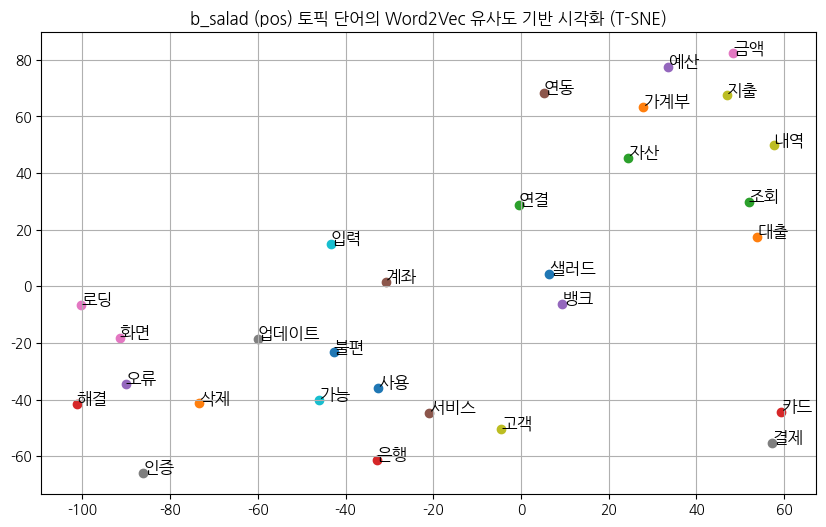

[b_salad] (neg) 최적 토픽 수 계산 중 ...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.3429
토픽수: 3, Coherence Score: 0.3863
토픽수: 4, Coherence Score: 0.3205
토픽수: 5, Coherence Score: 0.3694
토픽수: 6, Coherence Score: 0.3652
토픽수: 7, Coherence Score: 0.3816
토픽수: 8, Coherence Score: 0.3636
최적 토픽수: 3 (Score: 0.3863)
[b_salad] (neg) 토필별 상위 영어 (k=3)
Topic #0: ['고객', '연동', '예산', '금액', '결제', '해결', '카드', '지출', '사용', '내역']
Topic #1: ['자산', '불편', '은행', '삭제', '로딩', '오류', '화면', '인증', '업데이트', '입력']
Topic #2: ['가능', '서비스', '지출', '계좌', '가계부', '샐러드', '뱅크', '조회', '대출', '연결']
토픽 단어 총 29개
word2vec에 포함된 토픽 단어 수: 29개


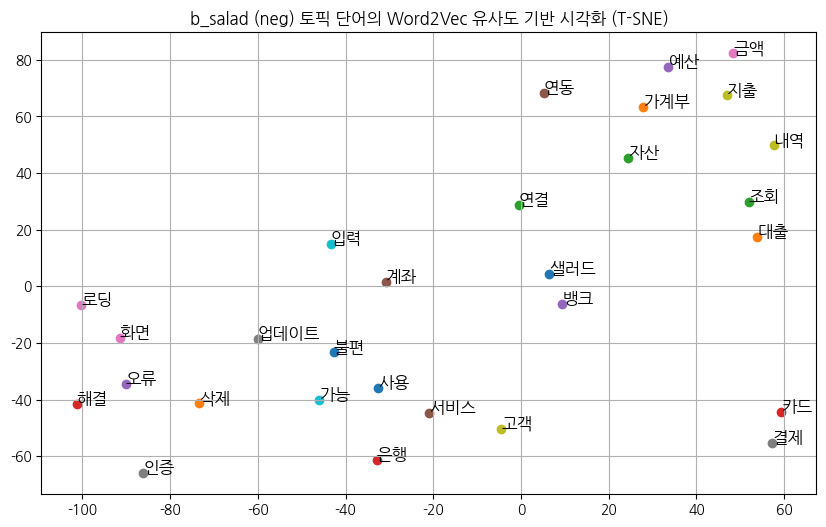

[b_salad] (pos) 최적 토픽 수 계산 중 ...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.3429
토픽수: 3, Coherence Score: 0.3863
토픽수: 4, Coherence Score: 0.3205
토픽수: 5, Coherence Score: 0.3694
토픽수: 6, Coherence Score: 0.3652
토픽수: 7, Coherence Score: 0.3816
토픽수: 8, Coherence Score: 0.3636
최적 토픽수: 3 (Score: 0.3863)
[b_salad] (pos) 토필별 상위 영어 (k=3)
Topic #0: ['고객', '연동', '예산', '금액', '결제', '해결', '카드', '지출', '사용', '내역']
Topic #1: ['자산', '불편', '은행', '삭제', '로딩', '오류', '화면', '인증', '업데이트', '입력']
Topic #2: ['가능', '서비스', '지출', '계좌', '가계부', '샐러드', '뱅크', '조회', '대출', '연결']
토픽 단어 총 29개
word2vec에 포함된 토픽 단어 수: 29개


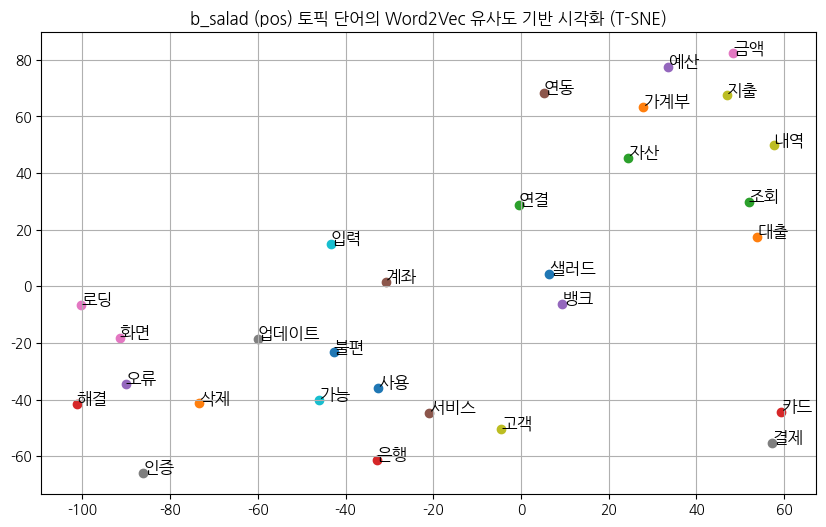

[b_salad] (neg) 최적 토픽 수 계산 중 ...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.3429
토픽수: 3, Coherence Score: 0.3863
토픽수: 4, Coherence Score: 0.3205
토픽수: 5, Coherence Score: 0.3694
토픽수: 6, Coherence Score: 0.3652
토픽수: 7, Coherence Score: 0.3816
토픽수: 8, Coherence Score: 0.3636
최적 토픽수: 3 (Score: 0.3863)
[b_salad] (neg) 토필별 상위 영어 (k=3)
Topic #0: ['고객', '연동', '예산', '금액', '결제', '해결', '카드', '지출', '사용', '내역']
Topic #1: ['자산', '불편', '은행', '삭제', '로딩', '오류', '화면', '인증', '업데이트', '입력']
Topic #2: ['가능', '서비스', '지출', '계좌', '가계부', '샐러드', '뱅크', '조회', '대출', '연결']
토픽 단어 총 29개
word2vec에 포함된 토픽 단어 수: 29개


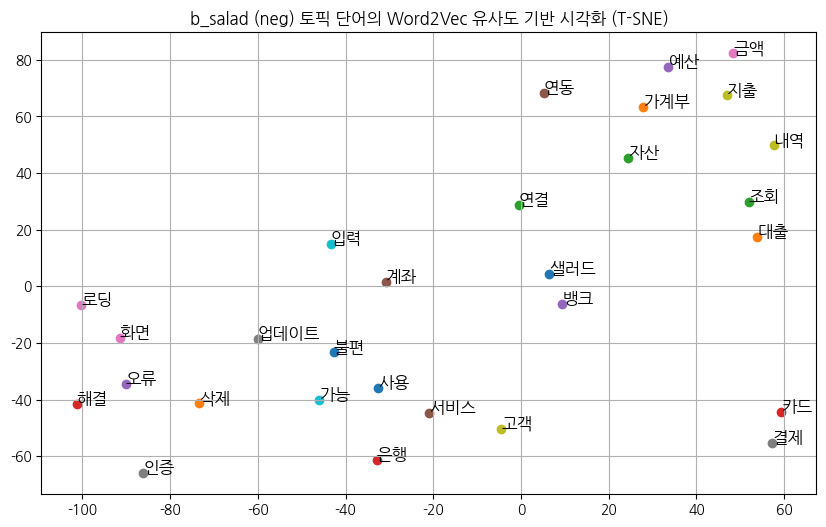

[b_salad] (pos) 최적 토픽 수 계산 중 ...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.3429
토픽수: 3, Coherence Score: 0.3863
토픽수: 4, Coherence Score: 0.3205
토픽수: 5, Coherence Score: 0.3694
토픽수: 6, Coherence Score: 0.3652
토픽수: 7, Coherence Score: 0.3816
토픽수: 8, Coherence Score: 0.3636
최적 토픽수: 3 (Score: 0.3863)
[b_salad] (pos) 토필별 상위 영어 (k=3)
Topic #0: ['고객', '연동', '예산', '금액', '결제', '해결', '카드', '지출', '사용', '내역']
Topic #1: ['자산', '불편', '은행', '삭제', '로딩', '오류', '화면', '인증', '업데이트', '입력']
Topic #2: ['가능', '서비스', '지출', '계좌', '가계부', '샐러드', '뱅크', '조회', '대출', '연결']
토픽 단어 총 29개
word2vec에 포함된 토픽 단어 수: 29개


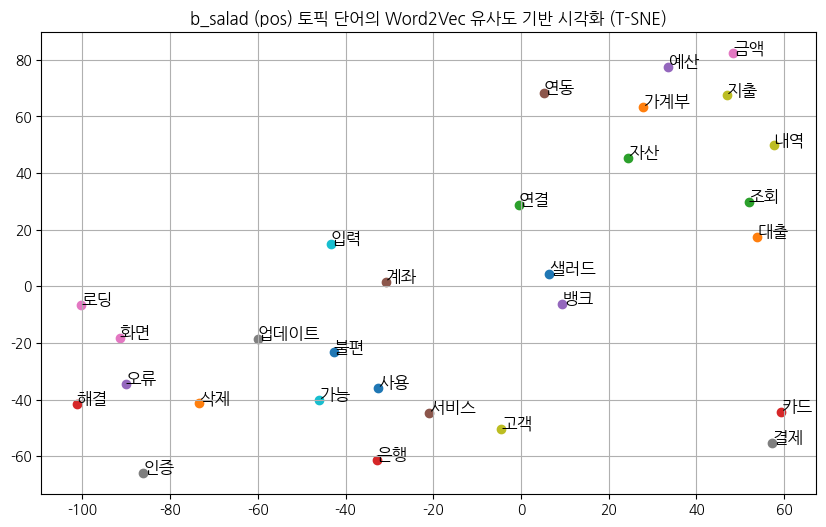

[b_salad] (neg) 최적 토픽 수 계산 중 ...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.3429
토픽수: 3, Coherence Score: 0.3863
토픽수: 4, Coherence Score: 0.3205
토픽수: 5, Coherence Score: 0.3694
토픽수: 6, Coherence Score: 0.3652
토픽수: 7, Coherence Score: 0.3816
토픽수: 8, Coherence Score: 0.3636
최적 토픽수: 3 (Score: 0.3863)
[b_salad] (neg) 토필별 상위 영어 (k=3)
Topic #0: ['고객', '연동', '예산', '금액', '결제', '해결', '카드', '지출', '사용', '내역']
Topic #1: ['자산', '불편', '은행', '삭제', '로딩', '오류', '화면', '인증', '업데이트', '입력']
Topic #2: ['가능', '서비스', '지출', '계좌', '가계부', '샐러드', '뱅크', '조회', '대출', '연결']
토픽 단어 총 29개
word2vec에 포함된 토픽 단어 수: 29개


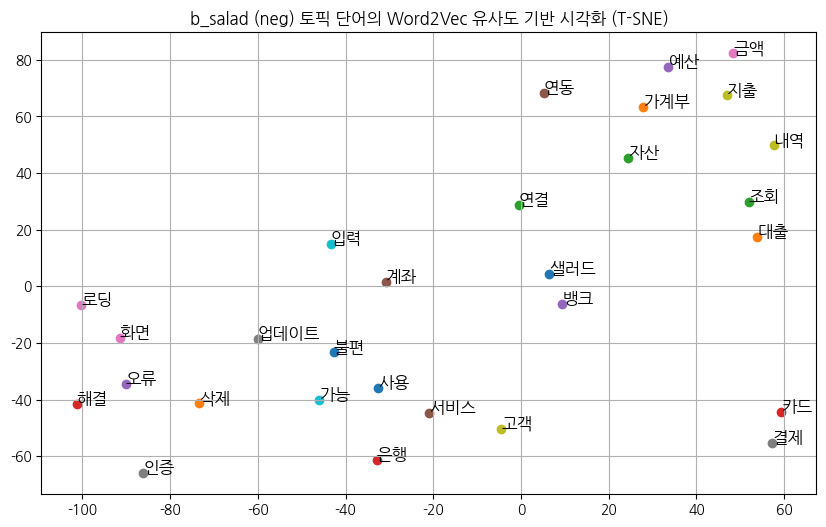

[b_salad] (pos) 최적 토픽 수 계산 중 ...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.3429
토픽수: 3, Coherence Score: 0.3863
토픽수: 4, Coherence Score: 0.3205
토픽수: 5, Coherence Score: 0.3694
토픽수: 6, Coherence Score: 0.3652
토픽수: 7, Coherence Score: 0.3816
토픽수: 8, Coherence Score: 0.3636
최적 토픽수: 3 (Score: 0.3863)
[b_salad] (pos) 토필별 상위 영어 (k=3)
Topic #0: ['고객', '연동', '예산', '금액', '결제', '해결', '카드', '지출', '사용', '내역']
Topic #1: ['자산', '불편', '은행', '삭제', '로딩', '오류', '화면', '인증', '업데이트', '입력']
Topic #2: ['가능', '서비스', '지출', '계좌', '가계부', '샐러드', '뱅크', '조회', '대출', '연결']
토픽 단어 총 29개
word2vec에 포함된 토픽 단어 수: 29개


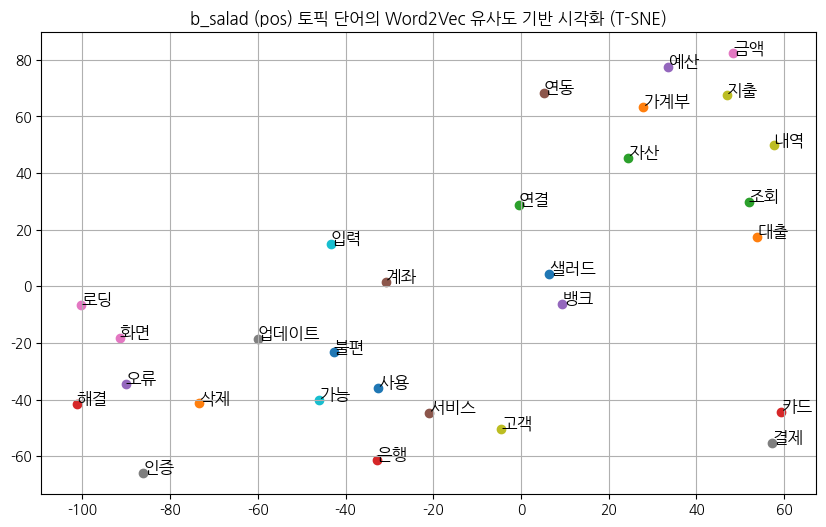

[b_salad] (neg) 최적 토픽 수 계산 중 ...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.3429
토픽수: 3, Coherence Score: 0.3863
토픽수: 4, Coherence Score: 0.3205
토픽수: 5, Coherence Score: 0.3694
토픽수: 6, Coherence Score: 0.3652
토픽수: 7, Coherence Score: 0.3816
토픽수: 8, Coherence Score: 0.3636
최적 토픽수: 3 (Score: 0.3863)
[b_salad] (neg) 토필별 상위 영어 (k=3)
Topic #0: ['고객', '연동', '예산', '금액', '결제', '해결', '카드', '지출', '사용', '내역']
Topic #1: ['자산', '불편', '은행', '삭제', '로딩', '오류', '화면', '인증', '업데이트', '입력']
Topic #2: ['가능', '서비스', '지출', '계좌', '가계부', '샐러드', '뱅크', '조회', '대출', '연결']
토픽 단어 총 29개
word2vec에 포함된 토픽 단어 수: 29개


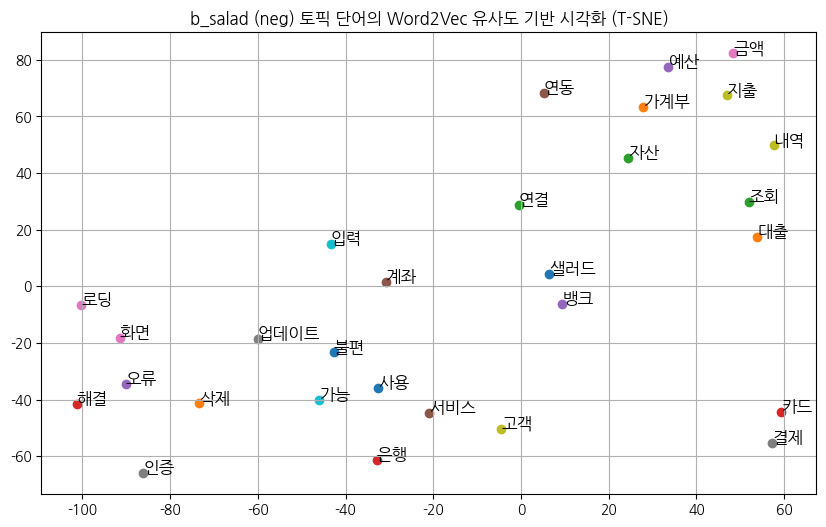

[b_salad] (pos) 최적 토픽 수 계산 중 ...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.3429
토픽수: 3, Coherence Score: 0.3863
토픽수: 4, Coherence Score: 0.3205
토픽수: 5, Coherence Score: 0.3694
토픽수: 6, Coherence Score: 0.3652
토픽수: 7, Coherence Score: 0.3816
토픽수: 8, Coherence Score: 0.3636
최적 토픽수: 3 (Score: 0.3863)
[b_salad] (pos) 토필별 상위 영어 (k=3)
Topic #0: ['고객', '연동', '예산', '금액', '결제', '해결', '카드', '지출', '사용', '내역']
Topic #1: ['자산', '불편', '은행', '삭제', '로딩', '오류', '화면', '인증', '업데이트', '입력']
Topic #2: ['가능', '서비스', '지출', '계좌', '가계부', '샐러드', '뱅크', '조회', '대출', '연결']
토픽 단어 총 29개
word2vec에 포함된 토픽 단어 수: 29개


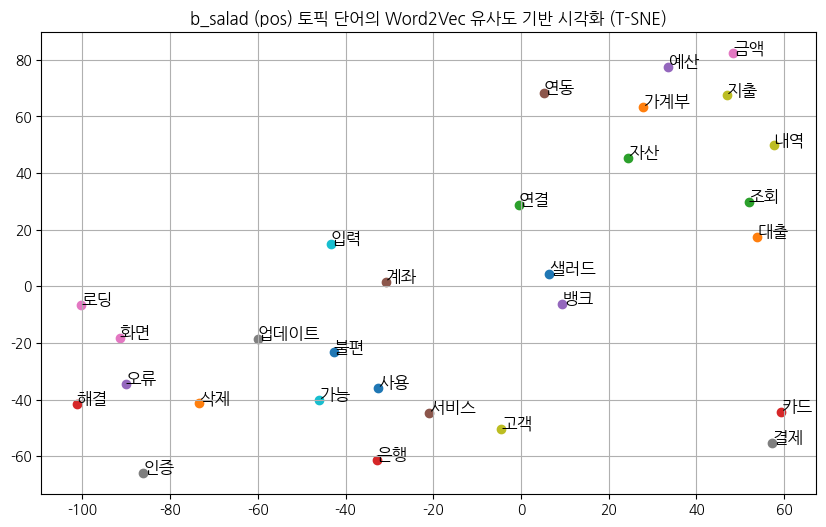

[b_salad] (neg) 최적 토픽 수 계산 중 ...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.3429
토픽수: 3, Coherence Score: 0.3863
토픽수: 4, Coherence Score: 0.3205
토픽수: 5, Coherence Score: 0.3694
토픽수: 6, Coherence Score: 0.3652
토픽수: 7, Coherence Score: 0.3816
토픽수: 8, Coherence Score: 0.3636
최적 토픽수: 3 (Score: 0.3863)
[b_salad] (neg) 토필별 상위 영어 (k=3)
Topic #0: ['고객', '연동', '예산', '금액', '결제', '해결', '카드', '지출', '사용', '내역']
Topic #1: ['자산', '불편', '은행', '삭제', '로딩', '오류', '화면', '인증', '업데이트', '입력']
Topic #2: ['가능', '서비스', '지출', '계좌', '가계부', '샐러드', '뱅크', '조회', '대출', '연결']
토픽 단어 총 29개
word2vec에 포함된 토픽 단어 수: 29개


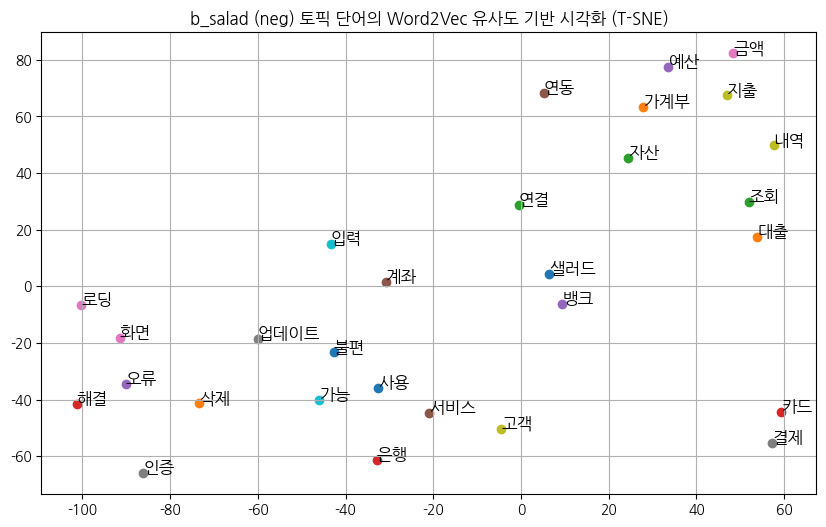

[b_salad] (pos) 최적 토픽 수 계산 중 ...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.3429
토픽수: 3, Coherence Score: 0.3863
토픽수: 4, Coherence Score: 0.3205
토픽수: 5, Coherence Score: 0.3694
토픽수: 6, Coherence Score: 0.3652
토픽수: 7, Coherence Score: 0.3816
토픽수: 8, Coherence Score: 0.3636
최적 토픽수: 3 (Score: 0.3863)
[b_salad] (pos) 토필별 상위 영어 (k=3)
Topic #0: ['고객', '연동', '예산', '금액', '결제', '해결', '카드', '지출', '사용', '내역']
Topic #1: ['자산', '불편', '은행', '삭제', '로딩', '오류', '화면', '인증', '업데이트', '입력']
Topic #2: ['가능', '서비스', '지출', '계좌', '가계부', '샐러드', '뱅크', '조회', '대출', '연결']
토픽 단어 총 29개
word2vec에 포함된 토픽 단어 수: 29개


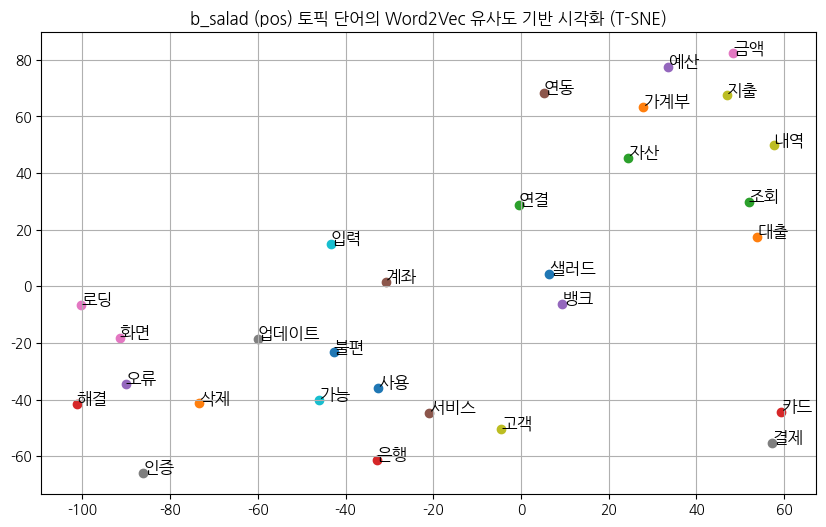

[b_salad] (neg) 최적 토픽 수 계산 중 ...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.3429
토픽수: 3, Coherence Score: 0.3863
토픽수: 4, Coherence Score: 0.3205
토픽수: 5, Coherence Score: 0.3694
토픽수: 6, Coherence Score: 0.3652
토픽수: 7, Coherence Score: 0.3816
토픽수: 8, Coherence Score: 0.3636
최적 토픽수: 3 (Score: 0.3863)
[b_salad] (neg) 토필별 상위 영어 (k=3)
Topic #0: ['고객', '연동', '예산', '금액', '결제', '해결', '카드', '지출', '사용', '내역']
Topic #1: ['자산', '불편', '은행', '삭제', '로딩', '오류', '화면', '인증', '업데이트', '입력']
Topic #2: ['가능', '서비스', '지출', '계좌', '가계부', '샐러드', '뱅크', '조회', '대출', '연결']
토픽 단어 총 29개
word2vec에 포함된 토픽 단어 수: 29개


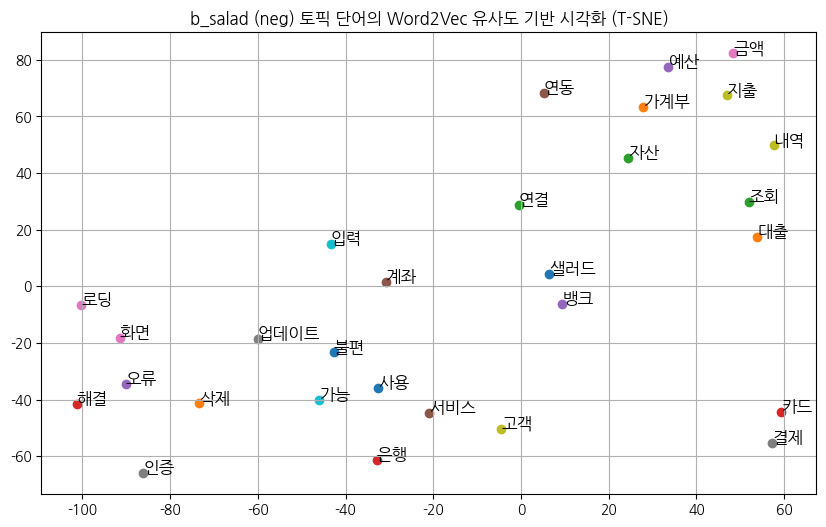

In [59]:
# Word2Vec 학습 train_df 전체 단어에 대해서 학습
w2v_model = None
all_reviews = train_df['사용자리뷰'].dropna().tolist()
all_tokenized = tokenize_texts(all_reviews)
w2v_model = Word2Vec(sentences=all_tokenized, vector_size=100, window=5, min_count=2, workers=4, sg=1)

for aank_eng, pn in pos_neg_dict.items():
    for senti, df_senti in pn.items():
        text_series = df_senti['사용자리뷰'].dropna()
        if len(text_series) < 20:
            print(f"{bank_eng} ({senti}) 리뷰 수 부족 ({len(text_series)}개) = 스킵")
            continue
        tests = text_series.tolist()
        
        # 최적 토픽 수 탐색
        try:
            print(f"[{bank_eng}] ({senti}) 최적 토픽 수 계산 중 ...")
            best_k = find_optimal_topics(texts)
        except:
            print(f"[{bank_eng}] ({senti}) 최적 토픽 수 계산 오류")
            continue
            
        # LDA용 토큰화
        tokenized_texts = tokenize_texts(texts)
        
        # CountVectorizer
        try:
            vectorizer = CountVectorizer(tokenizer=lambda x: x, token_pattern=None, lowercase=False, max_df=0.9, min_df=5)
            review_vec = vectorizer.fit_transform(tokenized_texts)
            
            if review_vec.shape[1] == 0:
                print(f"[{bank_eng}] ({senti}) min_df 조건 만족 단어 없음 - 스킵")
                continue
                
            # LDA 학습
            lda_model = LatentDirichletAllocation(n_components=best_k, random_state=42)
            lda_model.fit(review_vec)
            
            word = vectorizer.get_feature_names_out()
            
            # 토픽별 상위 단어 풀력 + 전체 단어 set에 모으기
            all_topic_word = set()
            print(f"[{bank_eng}] ({senti}) 토필별 상위 영어 (k={best_k})")
            print("=" * 60)
            for i, topic in enumerate(lda_model.components_):
                top = [word[idx] for idx in topic.argsort()[-10:]]
                print(f"Topic #{i}: {top}")
                all_topic_word.update(top)
                
            print(f"토픽 단어 총 {len(all_topic_word)}개")
            
            # 토픽 단어 중 word2vec에 있는 것만 사용해서 시각화
            valid_words = [word for word in all_topic_word if word in w2v_model.wv]
            print(f"word2vec에 포함된 토픽 단어 수: {len(valid_words)}개")
            
            vectors = np.array([w2v_model.wv[word] for word in valid_words])
            
            tsne_perplexity = min(5, len(valid_words) -1)
            if tsne_perplexity < 2:
                tsne_perplexity = 2
                
            tsne = TSNE(n_components=2, random_state=42, perplexity=tsne_perplexity)
            reduced_vecs = tsne.fit_transform(vectors)
            
            # tsne 시각화
            plt.figure(figsize=(10,6))
            for i, word in enumerate(valid_words):
                x,y = reduced_vecs[i]
                plt.scatter(x,y)
                plt.text(x + 0.01, y + 0.01, word, fontsize=12)
            plt.title(f"{bank_eng} ({senti}) 토픽 단어의 Word2Vec 유사도 기반 시각화 (T-SNE)")
            plt.grid(True)
            plt.show()
        except Exception as e:
            print(e)

#  TensorBoard Embedding Projector 포함 + 2D t-SNE

In [53]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import tensorflow as tf
from tensorboard.plugins import projector

2025-11-20 10:37:01.763853: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-20 10:37:01.764809: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-20 10:37:01.965712: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-20 10:37:02.541432: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

In [54]:
def safe_name(s):
    return ''.join(c if c.isalnum() else '_' for c in str(s))

--- 토픽 모델링 시작 ---
✅ Word2Vec 학습 완료. 전체 리뷰 수: 22246

[hana] (pos) 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.2459
토픽수: 3, Coherence Score: 0.3418
토픽수: 4, Coherence Score: 0.3457
토픽수: 5, Coherence Score: 0.3132
토픽수: 6, Coherence Score: 0.3724
토픽수: 7, Coherence Score: 0.3521
토픽수: 8, Coherence Score: 0.3613
최적 토픽수: 6 (Score: 0.3724)


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



[hana] (pos) 토픽별 상위 단어 (K=6)
------------------------------------------------------------
Topic #0: ['안전', '설명', '환전', '설치', '기능', '오류', '인증', '친절', '편리', '사용']
Topic #1: ['도움', '생각', '모바일', '쿠폰', '자동', '메뉴', '혜택', '이벤트', '처리', '만족']
Topic #2: ['사람', '예금', '정보', '사용', '해결', '추천', '불편', '적금', '상품', '가입']
Topic #3: ['본인', '금융', '개조', '정상', '카드', '가능', '서비스', '이용', '감사', '편리']
Topic #4: ['직관', '금융', '은행', '이해', '통장', '번호', '확인', '설명', '이체', '계좌']
Topic #5: ['속도', '방문', '설치', '대출', '업데이트', '시간', '거래', '최고', '하나', '은행']
   ▶ 토픽 단어 총 54개
   ▶ Word2Vec에 포함된 토픽 단어 수: 54개


E0000 00:00:1763602641.953857     852 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1763602641.967898     852 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


   ✅ TensorBoard Embedding Projector 로그 생성: logs/embedding_hana_pos
   ▶ t-SNE perplexity = 5


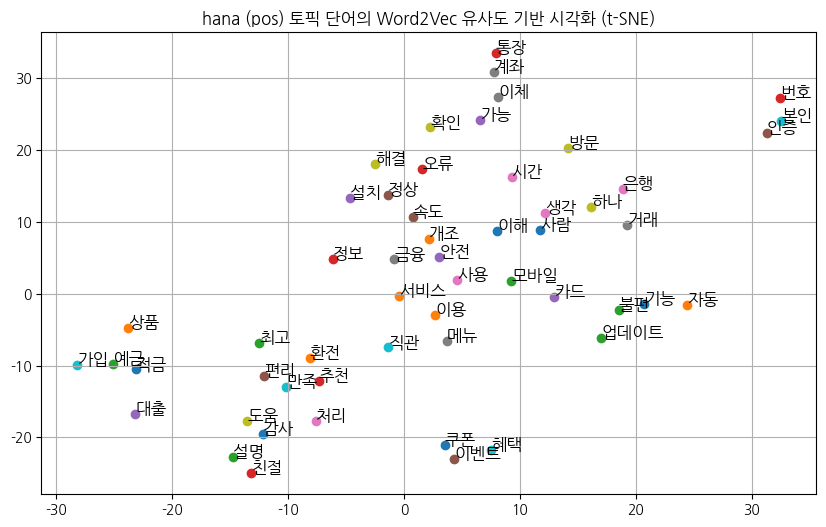


[hana] (neg) 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.6140
토픽수: 3, Coherence Score: 0.5810
토픽수: 4, Coherence Score: 0.5029
토픽수: 5, Coherence Score: 0.5244
토픽수: 6, Coherence Score: 0.5223
토픽수: 7, Coherence Score: 0.4778
토픽수: 8, Coherence Score: 0.5079
최적 토픽수: 2 (Score: 0.6140)


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



[hana] (neg) 토픽별 상위 단어 (K=2)
------------------------------------------------------------
Topic #0: ['가입', '입력', '설정', '이체', '번호', '화면', '등록', '계좌', '로그인', '인증']
Topic #1: ['이용', '설치', '삭제', '업데이트', '접속', '오류', '사용', '실행', '하나', '은행']
   ▶ 토픽 단어 총 20개
   ▶ Word2Vec에 포함된 토픽 단어 수: 20개
   ✅ TensorBoard Embedding Projector 로그 생성: logs/embedding_hana_neg
   ▶ t-SNE perplexity = 5


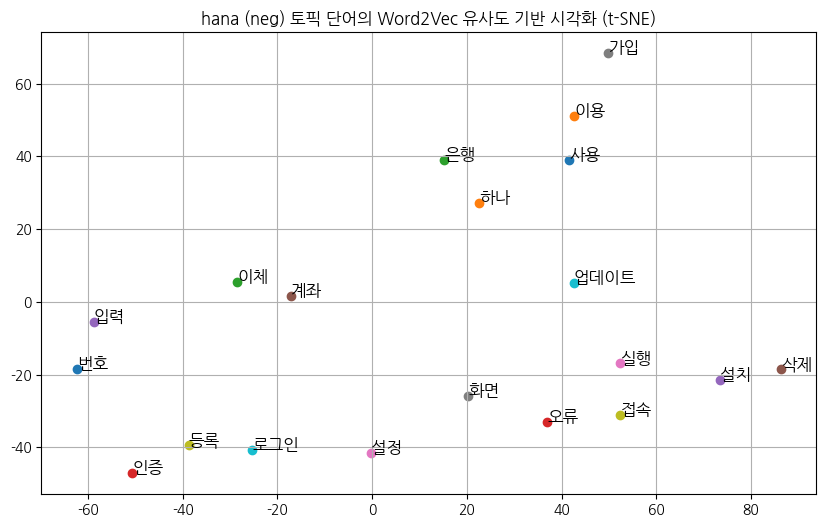


[shinhan] (pos) 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.3684
토픽수: 3, Coherence Score: 0.3878
토픽수: 4, Coherence Score: 0.4030
토픽수: 5, Coherence Score: 0.4365
토픽수: 6, Coherence Score: 0.4406
토픽수: 7, Coherence Score: 0.3807
토픽수: 8, Coherence Score: 0.3888
최적 토픽수: 6 (Score: 0.4406)


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



[shinhan] (pos) 토픽별 상위 단어 (K=6)
------------------------------------------------------------
Topic #0: ['확인', '이체', '가능', '카드', '거래', '메뉴', '은행', '사용', '신한은행', '신한']
Topic #1: ['개선', '신속', '경우', '서비스', '감사', '카드', '친절', '혜택', '이용', '포인트']
Topic #2: ['계좌', '불편', '설치', '이체', '뱅킹', '슈퍼', '만족', '뱅크', '최고', '신한']
Topic #3: ['부탁', '퀴즈', '문제', '은행', '업무', '조아', '확인', '생각', '감사', '정보']
Topic #4: ['처리', '계좌', '자체', '야구', '하나', '유용', '금융', '설정', '감사', '사용']
Topic #5: ['직관', '불편', '리뷰', '접속', '발전', '고객', '이벤트', '업데이트', '사용', '편리']
   ▶ 토픽 단어 총 49개
   ▶ Word2Vec에 포함된 토픽 단어 수: 49개
   ✅ TensorBoard Embedding Projector 로그 생성: logs/embedding_shinhan_pos
   ▶ t-SNE perplexity = 5


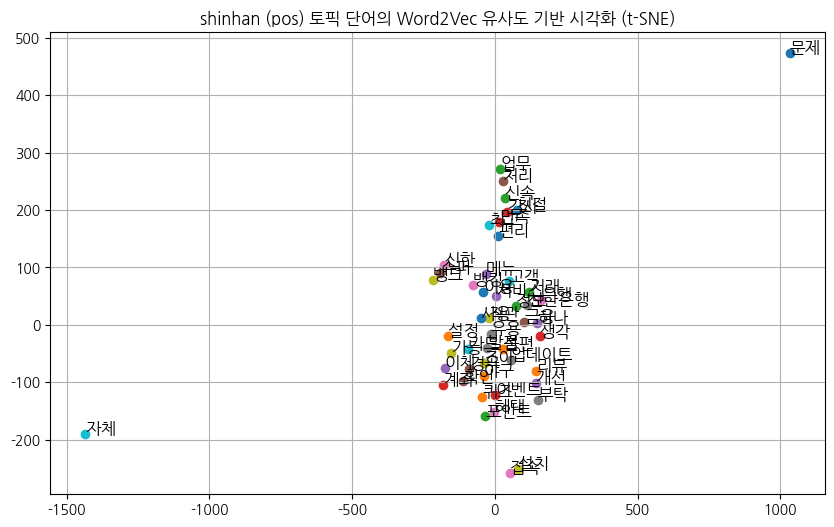


[shinhan] (neg) 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.5028
토픽수: 3, Coherence Score: 0.5506
토픽수: 4, Coherence Score: 0.5671
토픽수: 5, Coherence Score: 0.5610
토픽수: 6, Coherence Score: 0.5176
토픽수: 7, Coherence Score: 0.5061
토픽수: 8, Coherence Score: 0.5613
최적 토픽수: 4 (Score: 0.5671)


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



[shinhan] (neg) 토픽별 상위 단어 (K=4)
------------------------------------------------------------
Topic #0: ['자체', '오류', '접속', '업데이트', '로딩', '삭제', '실행', '화면', '설치', '로그인']
Topic #1: ['영상', '통화', '본인', '가입', '계좌', '인식', '문자', '번호', '신분증', '인증']
Topic #2: ['인증서', '로그인', '건지', '신한', '메뉴', '비밀', '번호', '이용', '슈퍼', '업데이트']
Topic #3: ['내역', '신한은행', '카드', '사용', '오류', '이체', '불편', '계좌', '신한', '은행']
   ▶ 토픽 단어 총 34개
   ▶ Word2Vec에 포함된 토픽 단어 수: 34개
   ✅ TensorBoard Embedding Projector 로그 생성: logs/embedding_shinhan_neg
   ▶ t-SNE perplexity = 5


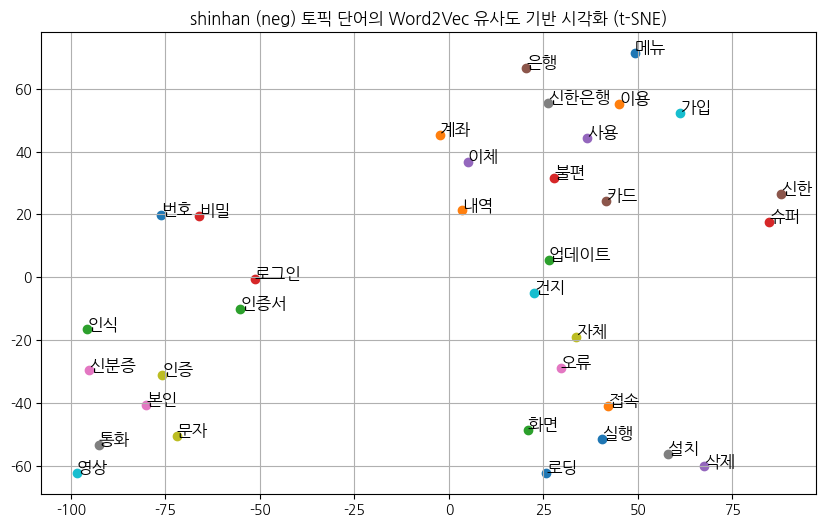


[kb] (pos) 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4597
토픽수: 3, Coherence Score: 0.4853
토픽수: 4, Coherence Score: 0.4579
토픽수: 5, Coherence Score: 0.4452
토픽수: 6, Coherence Score: 0.4118
토픽수: 7, Coherence Score: 0.3918
토픽수: 8, Coherence Score: 0.3669
최적 토픽수: 3 (Score: 0.4853)


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



[kb] (pos) 토픽별 상위 단어 (K=3)
------------------------------------------------------------
Topic #0: ['이체', '은행', '계좌', '금융', '불편', '직원', '감사', '설명', '친절', '가입']
Topic #1: ['국민', '처음', '국민은행', '안내', '서비스', '신속', '스타', '뱅킹', '최고', '사용']
Topic #2: ['거래', '업무', '국민은행', '환전', '처리', '감사', '이용', '은행', '만족', '편리']
   ▶ 토픽 단어 총 27개
   ▶ Word2Vec에 포함된 토픽 단어 수: 27개
   ✅ TensorBoard Embedding Projector 로그 생성: logs/embedding_kb_pos
   ▶ t-SNE perplexity = 5


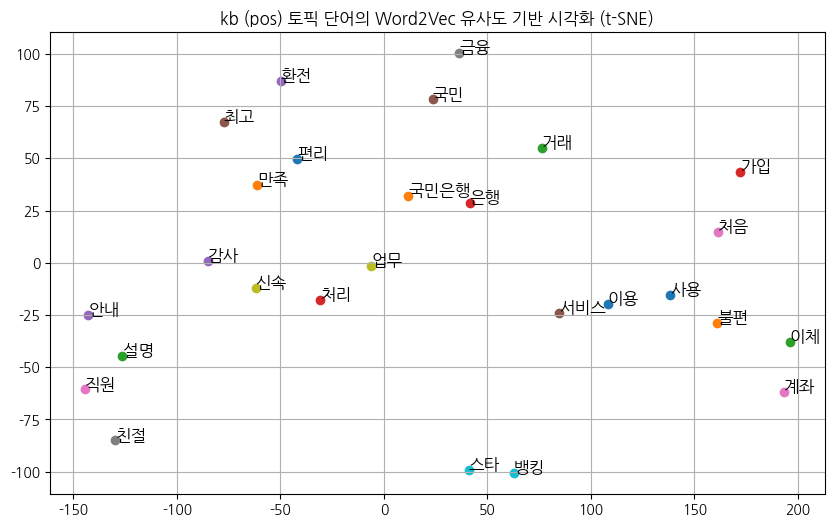


[kb] (neg) 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4468
토픽수: 3, Coherence Score: 0.4539
토픽수: 4, Coherence Score: 0.5895
토픽수: 5, Coherence Score: 0.4750
토픽수: 6, Coherence Score: 0.4952
토픽수: 7, Coherence Score: 0.5114
토픽수: 8, Coherence Score: 0.5505
최적 토픽수: 4 (Score: 0.5895)


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



[kb] (neg) 토픽별 상위 단어 (K=4)
------------------------------------------------------------
Topic #0: ['기능', '불편', '은행', '지문', '쓰레기', '국민은행', '계좌', '결제', '이체', '인식']
Topic #1: ['시간', '고객', '설치', '해결', '화면', '삭제', '사용', '접속', '오류', '로그인']
Topic #2: ['무한', '입출금', '사용', '은행', '스타', '뱅킹', '연동', '측정', '업데이트', '걸음']
Topic #3: ['국민', '발급', '계좌', '인증서', '확인', '가입', '은행', '신분증', '번호', '인증']
   ▶ 토픽 단어 총 36개
   ▶ Word2Vec에 포함된 토픽 단어 수: 36개
   ✅ TensorBoard Embedding Projector 로그 생성: logs/embedding_kb_neg
   ▶ t-SNE perplexity = 5


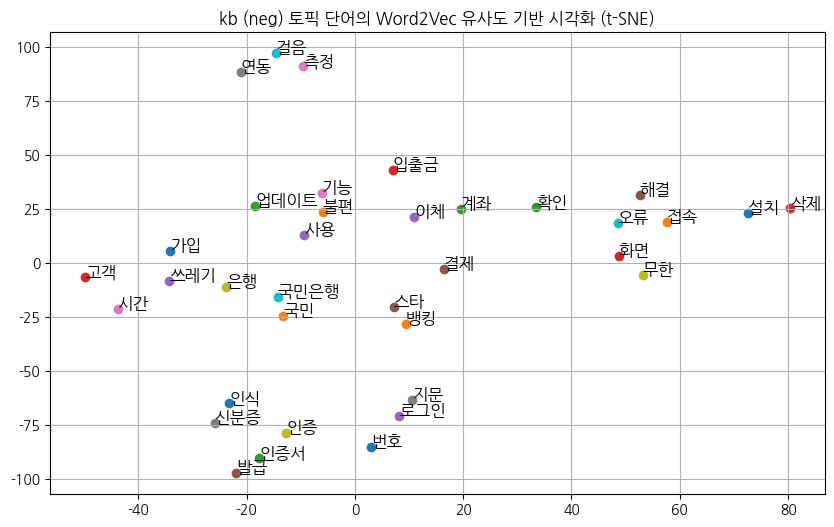


[toss] (pos) 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.5043
토픽수: 3, Coherence Score: 0.6185
토픽수: 4, Coherence Score: 0.5343
토픽수: 5, Coherence Score: 0.5463
토픽수: 6, Coherence Score: 0.5447
토픽수: 7, Coherence Score: 0.5392
토픽수: 8, Coherence Score: 0.4885
최적 토픽수: 3 (Score: 0.6185)


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



[toss] (pos) 토픽별 상위 단어 (K=3)
------------------------------------------------------------
Topic #0: ['불편', '문제', '증권', '최고', '오류', '충전', '업데이트', '카드', '토스', '사용']
Topic #1: ['송금', '기능', '불편', '번호', '확인', '내역', '화면', '포인트', '계좌', '토스']
Topic #2: ['정보', '이용', '추가', '주식', '카드', '감사', '기능', '사용', '편리', '토스']
   ▶ 토픽 단어 총 24개
   ▶ Word2Vec에 포함된 토픽 단어 수: 24개
   ✅ TensorBoard Embedding Projector 로그 생성: logs/embedding_toss_pos
   ▶ t-SNE perplexity = 5


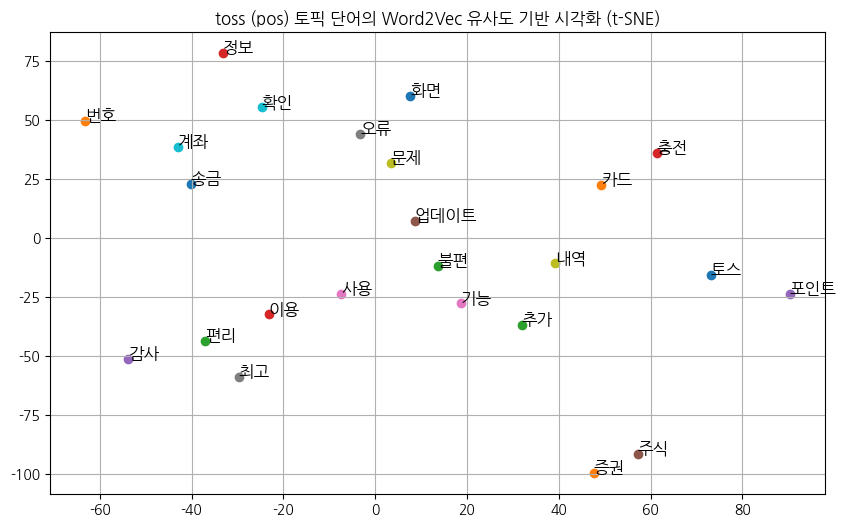


[toss] (neg) 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.3696
토픽수: 3, Coherence Score: 0.4211
토픽수: 4, Coherence Score: 0.3751
토픽수: 5, Coherence Score: 0.4311
토픽수: 6, Coherence Score: 0.4573
토픽수: 7, Coherence Score: 0.4970
토픽수: 8, Coherence Score: 0.4871
최적 토픽수: 7 (Score: 0.4970)


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



[toss] (neg) 토픽별 상위 단어 (K=7)
------------------------------------------------------------
Topic #0: ['가입', '로그인', '신분증', '확인', '정보', '번호', '결제', '계좌', '인증', '토스']
Topic #1: ['출금', '주식', '구매', '친구', '수수료', '포인트', '사람', '이벤트', '증권', '토스']
Topic #2: ['화면', '오류', '삭제', '송금', '인식', '사용', '업데이트', '주식', '설치', '토스']
Topic #3: ['문제', '적립', '이상', '쇼핑', '기능', '라이브', '복권', '만보기', '업데이트', '포인트']
Topic #4: ['강제', '업데이트', '불편', '데이터', '동영상', '혜택', '화면', '사용', '토스', '광고']
Topic #5: ['은행', '금액', '문제', '잔액', '업데이트', '계좌', '불편', '내역', '토스', '오류']
Topic #6: ['교통', '버스', '방문', '고양이', '교통카드', '토스', '점검', '미션', '충전', '카드']
   ▶ 토픽 단어 총 54개
   ▶ Word2Vec에 포함된 토픽 단어 수: 54개
   ✅ TensorBoard Embedding Projector 로그 생성: logs/embedding_toss_neg
   ▶ t-SNE perplexity = 5


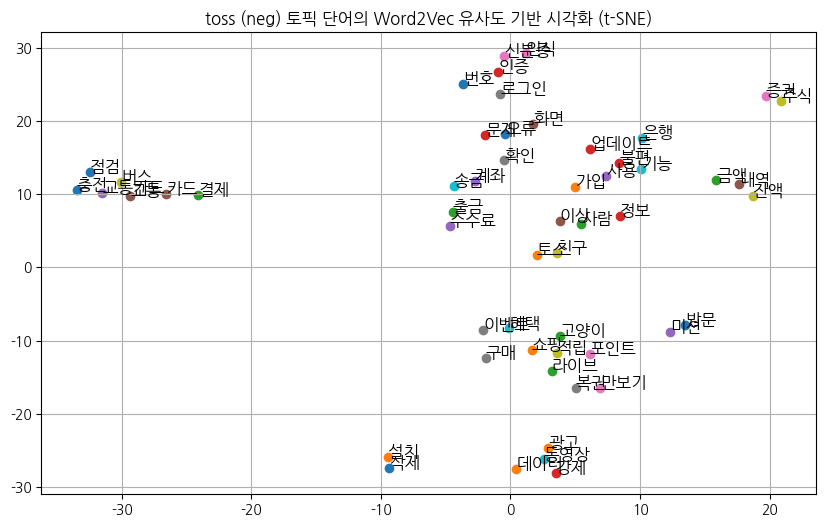


[woori] (pos) 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.4170
토픽수: 3, Coherence Score: 0.4438
토픽수: 4, Coherence Score: 0.4351
토픽수: 5, Coherence Score: 0.4267
토픽수: 6, Coherence Score: 0.4404
토픽수: 7, Coherence Score: 0.4237
토픽수: 8, Coherence Score: 0.4305
최적 토픽수: 3 (Score: 0.4438)


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



[woori] (pos) 토픽별 상위 단어 (K=3)
------------------------------------------------------------
Topic #0: ['감사', '정보', '거래', '뱅킹', '최고', '가입', '이용', '만족', '우리', '은행']
Topic #1: ['필요', '이체', '계좌', '확인', '불편', '적금', '로그인', '이벤트', '가입', '상품']
Topic #2: ['가능', '직원', '상담', '예금', '가입', '설명', '감사', '친절', '사용', '편리']
   ▶ 토픽 단어 총 27개
   ▶ Word2Vec에 포함된 토픽 단어 수: 27개
   ✅ TensorBoard Embedding Projector 로그 생성: logs/embedding_woori_pos
   ▶ t-SNE perplexity = 5


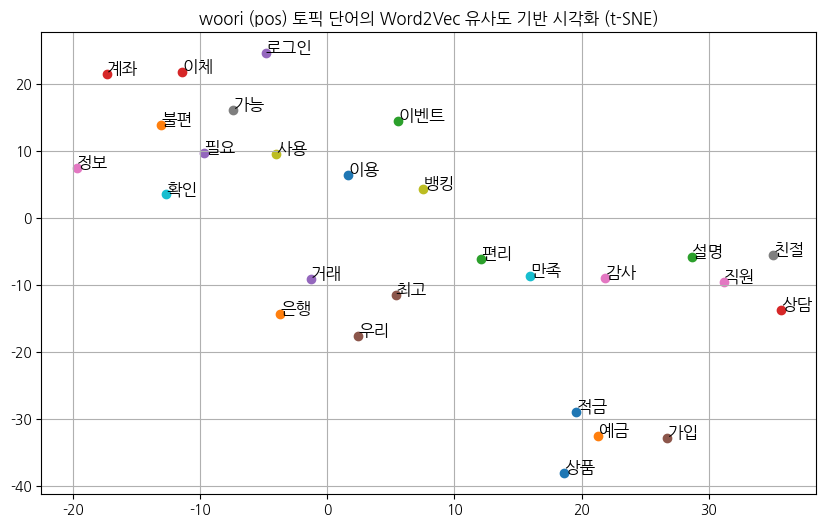


[woori] (neg) 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.5933
토픽수: 3, Coherence Score: 0.5562
토픽수: 4, Coherence Score: 0.5358
토픽수: 5, Coherence Score: 0.5383
토픽수: 6, Coherence Score: 0.5385
토픽수: 7, Coherence Score: 0.5506
토픽수: 8, Coherence Score: 0.5269
최적 토픽수: 2 (Score: 0.5933)


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



[woori] (neg) 토픽별 상위 단어 (K=2)
------------------------------------------------------------
Topic #0: ['카드', '거래', '최악', '사용', '신분증', '얼굴', '인식', '우리', '인증', '은행']
Topic #1: ['인증서', '사용', '번호', '등록', '이체', '계좌', '증서', '불편', '로그인', '업데이트']
   ▶ 토픽 단어 총 19개
   ▶ Word2Vec에 포함된 토픽 단어 수: 19개
   ✅ TensorBoard Embedding Projector 로그 생성: logs/embedding_woori_neg
   ▶ t-SNE perplexity = 5


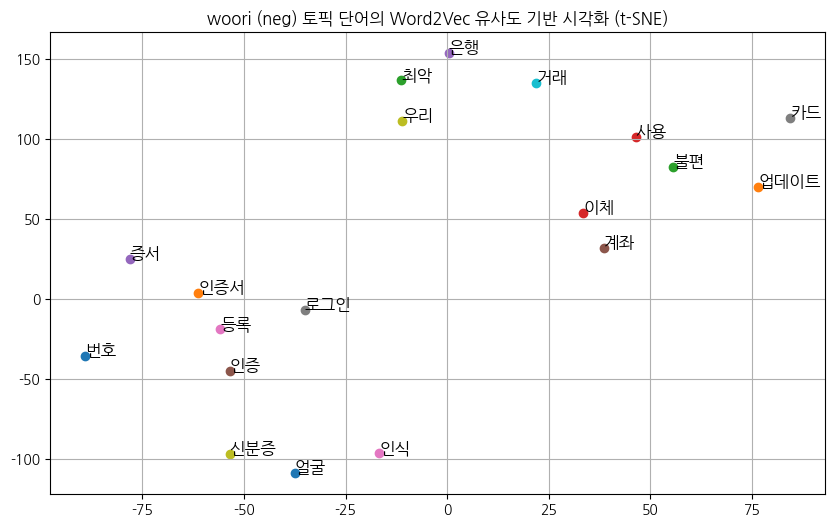


[b_salad] (pos) 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.5051
토픽수: 3, Coherence Score: 0.4617
토픽수: 4, Coherence Score: 0.4009
토픽수: 5, Coherence Score: 0.3725
토픽수: 6, Coherence Score: 0.4202
토픽수: 7, Coherence Score: 0.3889
토픽수: 8, Coherence Score: 0.4331
최적 토픽수: 2 (Score: 0.5051)


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



[b_salad] (pos) 토픽별 상위 단어 (K=2)
------------------------------------------------------------
Topic #0: ['설정', '샐러드', '추가', '지출', '뱅크', '예산', '연동', '사용', '가계부', '기능']
Topic #1: ['기능', '가계부', '추가', '금액', '계좌', '카드', '사용', '지출', '자산', '내역']
   ▶ 토픽 단어 총 15개
   ▶ Word2Vec에 포함된 토픽 단어 수: 15개
   ✅ TensorBoard Embedding Projector 로그 생성: logs/embedding_b_salad_pos
   ▶ t-SNE perplexity = 5


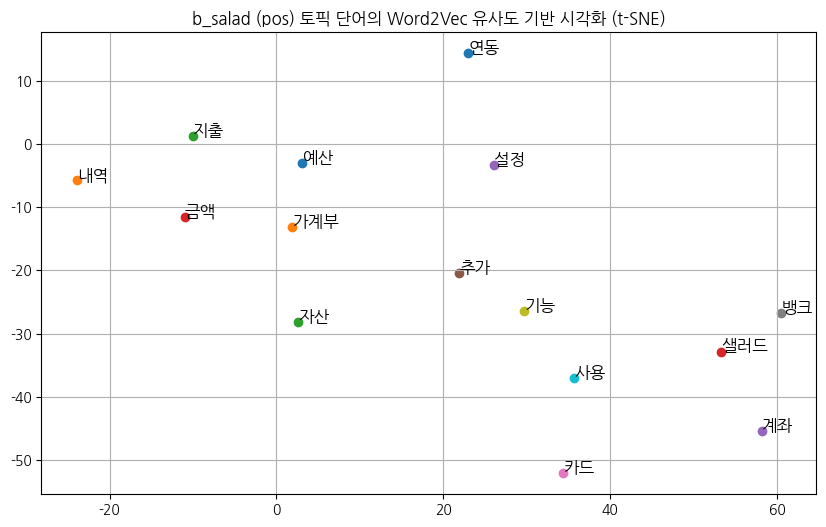


[b_salad] (neg) 최적 토픽 수 계산 중...


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


토픽수: 2, Coherence Score: 0.3429
토픽수: 3, Coherence Score: 0.3863
토픽수: 4, Coherence Score: 0.3205
토픽수: 5, Coherence Score: 0.3694
토픽수: 6, Coherence Score: 0.3652
토픽수: 7, Coherence Score: 0.3816
토픽수: 8, Coherence Score: 0.3636
최적 토픽수: 3 (Score: 0.3863)


/home/user/miniforge3/envs/fintech2/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



[b_salad] (neg) 토픽별 상위 단어 (K=3)
------------------------------------------------------------
Topic #0: ['고객', '연동', '예산', '금액', '결제', '해결', '카드', '지출', '사용', '내역']
Topic #1: ['자산', '불편', '은행', '삭제', '로딩', '오류', '화면', '인증', '업데이트', '입력']
Topic #2: ['가능', '서비스', '지출', '계좌', '가계부', '샐러드', '뱅크', '조회', '대출', '연결']
   ▶ 토픽 단어 총 29개
   ▶ Word2Vec에 포함된 토픽 단어 수: 29개
   ✅ TensorBoard Embedding Projector 로그 생성: logs/embedding_b_salad_neg
   ▶ t-SNE perplexity = 5


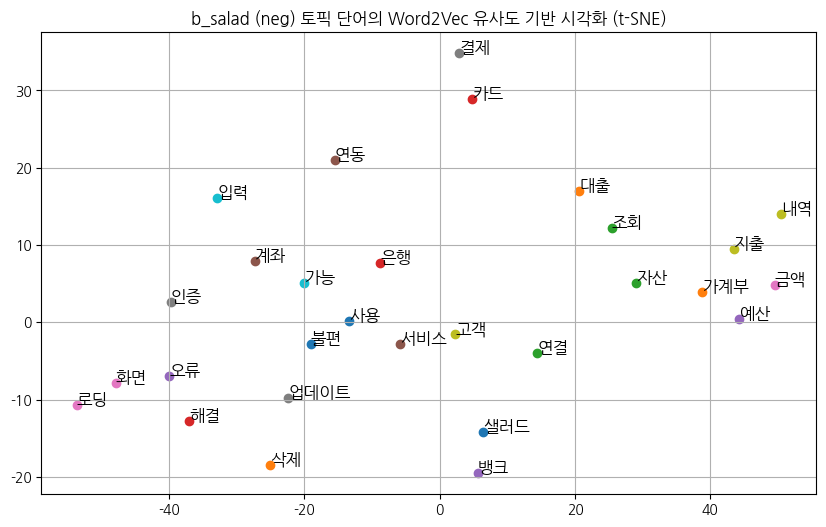

--- 최적 토픽 수 탐색 및 모델링 종료 ---


In [55]:
print("--- 토픽 모델링 시작 ---")

# 🔹 Word2Vec는 한 번만 학습 (train_df가 정의되어 있는 경우에만)
w2v_model = None
if 'train_df' in globals():
    all_reviews = train_df['사용자리뷰'].dropna().tolist()
    all_tokenized = tokenize_texts(all_reviews)
    w2v_model = Word2Vec(
        sentences=all_tokenized,
        vector_size=100,
        window=5,
        min_count=2,   # 단어 커버 늘리기
        workers=4,
        sg=1
    )
    print(f"✅ Word2Vec 학습 완료. 전체 리뷰 수: {len(all_reviews)}")
else:
    print("'train_df'가 정의되지 않아 Word2Vec 시각화를 건너뜁니다.")

for bank_eng, pn in pos_neg_dict.items():
    for senti, df_senti in pn.items():

        # 1) 컬럼 체크
        if '사용자리뷰' not in df_senti.columns:
            print(f"{bank_eng} ({senti}) '사용자리뷰' 컬럼 없음 - 스킵")
            continue

        # 2) NaN 제거
        texts_series = df_senti['사용자리뷰'].dropna()

        # 3) 리뷰 수 체크
        if len(texts_series) < 20:
            print(f"{bank_eng} ({senti}) 리뷰 수 부족 ({len(texts_series)}개) - 스킵")
            continue

        # 4) 문자열 리스트 준비
        texts = texts_series.tolist()

        # 5) 최적 토픽 수 탐색
        try:
            print(f"\n[{bank_eng}] ({senti}) 최적 토픽 수 계산 중...")
            best_k = find_optimal_topics(texts)
        except Exception as e:
            print(f"{bank_eng} ({senti}) 최적 토픽 수 계산 오류: {e}")
            continue

        # 6) LDA용 토큰화
        tokenized_texts = tokenize_texts(texts)

        try:
            # 이미 토큰화된 리스트를 사용하는 CountVectorizer
            vectorizer = CountVectorizer(
                tokenizer=lambda x: x,
                lowercase=False,
                max_df=0.9,
                min_df=5
            )
            review_vec = vectorizer.fit_transform(tokenized_texts)

            # min_df 조건으로 인해 단어가 모두 필터링된 경우
            if review_vec.shape[1] == 0:
                print(f"{bank_eng} ({senti}) min_df 조건 만족 단어 없음 - 스킱")
                continue

            # LDA 학습
            lda_model = LatentDirichletAllocation(n_components=best_k, random_state=42)
            lda_model.fit(review_vec)

            words = vectorizer.get_feature_names_out()

            # 토픽별 상위 단어 출력 + 전체 단어 set에 모으기
            all_topic_words = set()
            print(f"\n[{bank_eng}] ({senti}) 토픽별 상위 단어 (K={best_k})")
            print("-" * 60)
            for i, topic in enumerate(lda_model.components_):
                top = [words[idx] for idx in topic.argsort()[-10:]]
                print(f"Topic #{i}: {top}")
                all_topic_words.update(top)

            print(f"   ▶ 토픽 단어 총 {len(all_topic_words)}개")

            # 🔹 Word2Vec + t-SNE 시각화 & Embedding Projector
            if w2v_model is None:
                print("   ⚠ w2v_model 이 없어 시각화를 건너뜁니다.")
                continue

            # 토픽 단어 중 Word2Vec에 있는 것만 사용
            valid_words = [word for word in all_topic_words if word in w2v_model.wv]
            print(f"   ▶ Word2Vec에 포함된 토픽 단어 수: {len(valid_words)}개")

            if len(valid_words) < 3:
                print("   ⚠ Word2Vec 모델에 포함된 단어가 너무 적습니다 (3개 미만) - 시각화 스킵")
                continue

            vectors = np.array([w2v_model.wv[word] for word in valid_words])

            # ---------- (A) TensorBoard Embedding Projector 설정 ----------
            log_dir = os.path.join(
                "logs",
                f"embedding_{safe_name(bank_eng)}_{safe_name(senti)}"
            )
            os.makedirs(log_dir, exist_ok=True)

            # 텐서 변수 정의
            embedding_var = tf.Variable(vectors, name="word_embeddings")

            # 체크포인트 저장
            checkpoint = tf.train.Checkpoint(embedding=embedding_var)
            checkpoint.save(os.path.join(log_dir, "embedding.ckpt"))

            # 메타데이터 (단어 라벨) 저장
            metadata_path = os.path.join(log_dir, "metadata.tsv")
            with open(metadata_path, "w", encoding="utf-8") as f:
                # 첫 줄은 헤더(Optional)
                f.write("word\tbank\tsentiment\n")
                for w in valid_words:
                    f.write(f"{w}\t{bank_eng}\t{senti}\n")

            # Projector 설정 파일 생성
            config = projector.ProjectorConfig()
            embedding = config.embeddings.add()
            embedding.tensor_name = embedding_var.name
            embedding.metadata_path = "metadata.tsv"  # log_dir 기준 경로

            projector.visualize_embeddings(log_dir, config)

            print(f"   ✅ TensorBoard Embedding Projector 로그 생성: {log_dir}")
            # ---------------------------------------------------------

            # ---------- (B) t-SNE 2D 시각화 ----------
            # perplexity는 보통 5~50, 샘플 수보다 작아야 함
            tsne_perplexity = min(5, len(valid_words) - 1)
            if tsne_perplexity < 2:
                tsne_perplexity = 2   # 너무 작으면 2로 보정
            print(f"   ▶ t-SNE perplexity = {tsne_perplexity}")

            tsne = TSNE(
                n_components=2,
                random_state=0,
                perplexity=tsne_perplexity,
            )
            reduced_vecs = tsne.fit_transform(vectors)

            plt.figure(figsize=(10, 6))
            for i, word in enumerate(valid_words):
                x, y = reduced_vecs[i]
                plt.scatter(x, y)
                plt.text(x + 0.01, y + 0.01, word, fontsize=12)

            plt.title(f"{bank_eng} ({senti}) 토픽 단어의 Word2Vec 유사도 기반 시각화 (t-SNE)")
            plt.grid(True)
            plt.show()
            # ---------------------------------------------------------

        except ValueError as e:
            print(f"{bank_eng} ({senti}) LDA/Vectorizing 오류: {e}")
        except Exception as e:
            print(f"{bank_eng} ({senti}) 예기치 못한 오류: {e}")

print("--- 최적 토픽 수 탐색 및 모델링 종료 ---")


In [56]:
# tensorboard 매직 명령어
%load_ext tensorboard

# 각 은행의 로그 디렉토리 지정해서 실행
%tensorboard --logdir ./logs/embedding_toss_neg

* Projector 탭 이동: 우측 상단의 탭에서 **'Projector'**를 선택합니다.
* 시각화 확인:
  * 데이터가 로드되면 3D 공간에 단어들이 점으로 표시됩니다.
  * 왼쪽 패널에서 'Run' 드롭다운을 열어 shinhan, woori 등 분석한 은행별 데이터를 선택할 수 있습니다.
  * 왼쪽 'Dimensions'에서 t-SNE를 선택하고, 3D로 설정합니다.
  * 이제 마우스로 3D 공간을 돌려보거나 확대/축소하며 단어들의 군집을 인터랙티브하게 탐색할 수 있습니다.